# User-Study questionnaire results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

%matplotlib inline

import os
import sys
import datetime

In [2]:
GROUP_A_PATH = "/home/tomasmizera/d/data/user-study/results/XAI_Thesis_-_group_A2021-05-04_04_44_20.csv"
GROUP_B_PATH = "/home/tomasmizera/d/data/user-study/results/XAI_Thesis_-_group_B2021-05-04_04_43_10.csv"
GROUP_C_PATH = "/home/tomasmizera/d/data/user-study/results/XAI_Thesis_-_group_C2021-05-04_04_44_53.csv"

In [3]:
pda = pd.read_csv(GROUP_A_PATH)
pdb = pd.read_csv(GROUP_B_PATH)
pdc = pd.read_csv(GROUP_C_PATH)

In [4]:
len(pda.columns)

38

In [5]:
all([len(pda.columns) == len(pdb.columns), len(pdb.columns) == len(pdc.columns)])

False

In [6]:
pdb.columns

Index(['Submission Date', 't_a_before', 't_a_1', 't_a_2', 't_a_3', 't_a_4',
       't_b_before', 't_b_1', 't_b_2', 't_b_3', 't_b_4', 't_c_before', 't_c_1',
       't_c_2', 't_c_3', 't_c_4',
       '(Q3) Which category do you think the model would predict?',
       '(Q1) Which category do you think the model would predict?',
       '(Q4) Which category do you think the model would predict?',
       'Is this your first time filling up this questionnaire?',
       'Do you think that you understand the model more after seeing explanations than before seeing them?',
       'Have you looked differently at  texts after seeing explanations?  ',
       '(Q9) Which category do you think the model would predict?',
       'Place for your feedback',
       '(Q12) Which category do you think the model would predict?',
       'How much did the explanations affect your later predictions?',
       '(Q10) Which category do you think the model would predict?',
       'Have you spot some mistakes  of the 

In [7]:
pdc.columns

Index(['Submission Date',
       'Are you familiar with AI (Artificial Intelligence) concepts such as "model", "prediction", "cross validation" and "interpretability"?',
       'Is this your first time filling up this questionnaire?', 't_a_before',
       '(Q1) Which category do you think the model would predict?', 't_a_1',
       '(Q2) Which category do you think the model would predict?', 't_a_2',
       '(Q3) Which category do you think the model would predict?', 't_a_3',
       '(Q4) Which category do you think the model would predict?', 't_a_4',
       't_b_before',
       '(Q5) Which category do you think the model would predict?', 't_b_1',
       '(Q6) Which category do you think the model would predict?', 't_b_2',
       '(Q7) Which category do you think the model would predict?', 't_b_3',
       '(Q8) Which category do you think the model would predict?', 't_b_4',
       't_c_before',
       '(Q9) Which category do you think the model would predict?', 't_c_1',
       '(Q10) Wh

Remove _Last Update Date_ from group A and B

In [8]:
pda = pda.drop(columns=["Last Update Date", "Submission Date"])
pdb = pdb.drop(columns=["Last Update Date", "Submission Date"])
pdc = pdc.drop(columns="Submission Date")

In [9]:
all([len(pda.columns) == len(pdb.columns), len(pdb.columns) == len(pdc.columns)])

True

Number of columns are now equal

Let's convert column names to something easier to use

In [10]:
colmap = { f'(Q{i}) Which category do you think the model would predict?': f'q{i}' for i in range(1, 13) }

In [11]:
colmapadd = {
    'Are you familiar with AI (Artificial Intelligence) concepts such as "model", "prediction", "cross validation" and "interpretability"?': 'technical_background',
    'Is this your first time filling up this questionnaire?': 'first_time',
}

In [12]:
colmap = {**colmap, **colmapadd}
colmap

{'(Q1) Which category do you think the model would predict?': 'q1',
 '(Q2) Which category do you think the model would predict?': 'q2',
 '(Q3) Which category do you think the model would predict?': 'q3',
 '(Q4) Which category do you think the model would predict?': 'q4',
 '(Q5) Which category do you think the model would predict?': 'q5',
 '(Q6) Which category do you think the model would predict?': 'q6',
 '(Q7) Which category do you think the model would predict?': 'q7',
 '(Q8) Which category do you think the model would predict?': 'q8',
 '(Q9) Which category do you think the model would predict?': 'q9',
 '(Q10) Which category do you think the model would predict?': 'q10',
 '(Q11) Which category do you think the model would predict?': 'q11',
 '(Q12) Which category do you think the model would predict?': 'q12',
 'Are you familiar with AI (Artificial Intelligence) concepts such as "model", "prediction", "cross validation" and "interpretability"?': 'technical_background',
 'Is this your f

Keep questions in the end of questionnaire for later

In [13]:
pda = pda.rename(columns=colmap)
pdb = pdb.rename(columns=colmap)
pdc = pdc.rename(columns=colmap)

In [14]:
pda.columns

Index(['technical_background', 'first_time', 't_a_before', 'q1', 't_a_1', 'q2',
       't_a_2', 'q3', 't_a_3', 'q4', 't_a_4', 't_b_before', 'q5', 't_b_1',
       'q6', 't_b_2', 'q7', 't_b_3', 'q8', 't_b_4', 't_c_before', 'q9',
       't_c_1', 'q10', 't_c_2', 'q11', 't_c_3', 'q12', 't_c_4',
       'Have you looked differently at  texts after seeing explanations?  ',
       'How much did the explanations affect your later predictions?',
       'Do you think that you understand the model more after seeing explanations than before seeing them?',
       'After seeing explanations, do you trust the model's decisions more or less?',
       'To better understand the model, would you prefer shorter or longer texts than those provided?',
       'Have you spot some mistakes  of the model (places where it makes bad decisions)? If you did, try to describe them ',
       'Place for your feedback'],
      dtype='object')

### Number of submissions

In [15]:
pda.shape[0]

12

In [16]:
pdb.shape[0]

12

In [17]:
pdc.shape[0]

14

There are a total of **38 submissions**, from which
 - 12 in group A
 - 12 in group B
 - 14 in group C

Let's check if it was everyone's first time filling up the questionnaire

In [18]:
pda.first_time.value_counts()

Yes, this is my first time filling up this questionnaire    10
No, I have already filled up this questionnaire before       2
Name: first_time, dtype: int64

In [19]:
pdb.first_time.value_counts()

Yes, this is my first time filling up this questionnaire    12
Name: first_time, dtype: int64

In [20]:
pdc.first_time.value_counts()

Yes, this is my first time filling up this questionnaire    14
Name: first_time, dtype: int64

In group A there are 2 respondents that have already filled up the questionnaire. I know about one of them, he accidentaly closed the window and the second time filling it up he answered *No, I have already filled up..* However, we do not know anything about the other one, let's examine

In [21]:
pda.loc[pda.first_time.str.startswith("No")]

,technical_background,first_time,t_a_before,q1,t_a_1,q2,t_a_2,q3,t_a_3,q4,...,t_c_3,q12,t_c_4,Have you looked differently at texts after seeing explanations?,How much did the explanations affect your later predictions?,Do you think that you understand the model more after seeing explanations than before seeing them?,"After seeing explanations, do you trust the model's decisions more or less?","To better understand the model, would you prefer shorter or longer texts than those provided?","Have you spot some mistakes of the model (places where it makes bad decisions)? If you did, try to describe them",Place for your feedback
2,"No, I am not familiar","No, I have already filled up this questionnair...",Time taken to fill form: 00:11:09,Atheism,Time taken to fill form: 00:11:05,Christianity,Time taken to fill form: 00:09:37,Christianity,Time taken to fill form: 00:09:18,Christianity,...,Time taken to fill form: 00:02:12,Christianity,Time taken to fill form: 00:01:48,2,2,8,5,3,NaN,NaN
11,"Yes, I am familiar","No, I have already filled up this questionnair...",Time taken to fill form: 00:06:13,Atheism,Time taken to fill form: 00:06:11,Christianity,Time taken to fill form: 00:05:54,Christianity,Time taken to fill form: 00:05:39,Christianity,...,Time taken to fill form: 00:03:26,Christianity,Time taken to fill form: 00:03:21,7,8,8,5,5,"For example, I think testament don't have any ...",NaN


Submission #11 is the known respondent.

In [22]:
pda.iloc[pda.loc[pda.first_time.str.startswith("No")].index[0]]

technical_background                                                                                                                              No, I am not familiar
first_time                                                                                                            No, I have already filled up this questionnair...
t_a_before                                                                                                                            Time taken to fill form: 00:11:09
q1                                                                                                                                                              Atheism
t_a_1                                                                                                                                 Time taken to fill form: 00:11:05
q2                                                                                                                                                         Chris

Throw away the other submission. Keep the known one, but do not count time for it.

In [23]:
pda = pda.drop(index=pda.loc[pda.first_time.str.startswith("No")].index[0])

---
---

## Compare times to fill

**Description of time columns**
if col starts with t_x -> this is a time column
 - t_a -> sector one, no explanations
 - t_b -> sector two, after showing one explanation
 - t_c -> sector three, after showing two explanations
 
x_before -> timer on the start of the section, to be able to measure time of the section

In [24]:
timecols = list(filter(lambda x: x.startswith('t_'), pda.columns))

In [25]:
pdatimes = pda[timecols]
pdbtimes = pdb[timecols]
pdctimes = pdc[timecols]

In [26]:
pdctimes.head(2)

,t_a_before,t_a_1,t_a_2,t_a_3,t_a_4,t_b_before,t_b_1,t_b_2,t_b_3,t_b_4,t_c_before,t_c_1,t_c_2,t_c_3,t_c_4
0,Time taken to fill form: 00:23:07,Time taken to fill form: 00:22:36,Time taken to fill form: 00:21:06,Time taken to fill form: 00:20:54,Time taken to fill form: 00:20:42,Time taken to fill form: 00:18:44,Time taken to fill form: 00:18:15,Time taken to fill form: 00:17:59,Time taken to fill form: 00:17:07,Time taken to fill form: 00:16:56,Time taken to fill form: 00:12:40,Time taken to fill form: 00:12:38,Time taken to fill form: 00:12:21,Time taken to fill form: 00:08:45,Time taken to fill form: 00:08:08
1,Time taken to fill form: 00:06:41,Time taken to fill form: 00:06:19,Time taken to fill form: 00:06:02,Time taken to fill form: 00:05:54,Time taken to fill form: 00:05:32,Time taken to fill form: 00:04:43,Time taken to fill form: 00:04:41,Time taken to fill form: 00:04:28,Time taken to fill form: 00:04:08,Time taken to fill form: 00:03:51,Time taken to fill form: 00:02:16,Time taken to fill form: 00:02:12,Time taken to fill form: 00:01:54,Time taken to fill form: 00:01:46,Time taken to fill form: 00:01:32


In [27]:
pdatimes = pdatimes.replace(to_replace ='Time taken to fill form: ', value = '', regex = True)
pdbtimes = pdbtimes.replace(to_replace ='Time taken to fill form: ', value = '', regex = True)
pdctimes = pdctimes.replace(to_replace ='Time taken to fill form: ', value = '', regex = True)

In [28]:
pdatimes.dtypes

t_a_before    object
t_a_1         object
t_a_2         object
t_a_3         object
t_a_4         object
t_b_before    object
t_b_1         object
t_b_2         object
t_b_3         object
t_b_4         object
t_c_before    object
t_c_1         object
t_c_2         object
t_c_3         object
t_c_4         object
dtype: object

In [29]:
# convert to dates
def to_dates(df):
    cols = df.columns
    for col in cols:
        df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
    return df

In [30]:
pdatimes = to_dates(pdatimes)
pdbtimes = to_dates(pdbtimes)
pdctimes = to_dates(pdctimes)

In [31]:
pdatimes.dtypes

t_a_before    datetime64[ns]
t_a_1         datetime64[ns]
t_a_2         datetime64[ns]
t_a_3         datetime64[ns]
t_a_4         datetime64[ns]
t_b_before    datetime64[ns]
t_b_1         datetime64[ns]
t_b_2         datetime64[ns]
t_b_3         datetime64[ns]
t_b_4         datetime64[ns]
t_c_before    datetime64[ns]
t_c_1         datetime64[ns]
t_c_2         datetime64[ns]
t_c_3         datetime64[ns]
t_c_4         datetime64[ns]
dtype: object

In [32]:
pdatimes.style.highlight_max(subset='t_a_before')

,t_a_before,t_a_1,t_a_2,t_a_3,t_a_4,t_b_before,t_b_1,t_b_2,t_b_3,t_b_4,t_c_before,t_c_1,t_c_2,t_c_3,t_c_4
0,2021-05-14 00:32:19,2021-05-14 00:32:16,2021-05-14 00:31:29,2021-05-14 00:31:21,2021-05-14 00:31:09,2021-05-14 00:30:18,2021-05-14 00:30:15,2021-05-14 00:28:56,2021-05-14 00:28:45,2021-05-14 00:28:01,2021-05-14 00:25:28,2021-05-14 00:25:26,2021-05-14 00:24:07,2021-05-14 00:22:34,2021-05-14 00:21:31
1,2021-05-14 00:28:36,2021-05-14 00:28:22,2021-05-14 00:25:36,2021-05-14 00:25:16,2021-05-14 00:24:45,2021-05-14 00:21:16,2021-05-14 00:21:13,2021-05-14 00:20:46,2021-05-14 00:19:19,2021-05-14 00:18:15,2021-05-14 00:15:25,2021-05-14 00:15:22,2021-05-14 00:12:03,2021-05-14 00:11:30,2021-05-14 00:09:19
3,2021-05-14 00:08:49,2021-05-14 00:08:24,2021-05-14 00:07:28,2021-05-14 00:07:16,2021-05-14 00:07:05,2021-05-14 00:06:11,2021-05-14 00:06:09,2021-05-14 00:05:46,2021-05-14 00:04:57,2021-05-14 00:03:40,2021-05-14 00:02:59,2021-05-14 00:02:56,2021-05-14 00:02:44,2021-05-14 00:02:00,2021-05-14 00:01:13
4,2021-05-14 00:21:29,2021-05-14 00:21:04,2021-05-14 00:19:21,2021-05-14 00:18:45,2021-05-14 00:18:17,2021-05-14 00:15:58,2021-05-14 00:15:53,2021-05-14 00:15:33,2021-05-14 00:15:05,2021-05-14 00:14:49,2021-05-14 00:12:25,2021-05-14 00:12:23,2021-05-14 00:11:34,2021-05-14 00:10:48,2021-05-14 00:10:18
5,2021-05-14 00:07:26,2021-05-14 00:07:19,2021-05-14 00:03:49,2021-05-14 00:03:33,2021-05-14 00:03:08,2021-05-14 00:02:24,2021-05-14 00:02:22,2021-05-14 00:02:00,2021-05-14 00:01:45,2021-05-14 00:01:41,2021-05-14 00:01:22,2021-05-14 00:01:20,2021-05-14 00:01:12,2021-05-14 00:01:02,2021-05-14 00:00:52
6,2021-05-14 00:07:52,2021-05-14 00:07:24,2021-05-14 00:06:19,2021-05-14 00:06:03,2021-05-14 00:05:45,2021-05-14 00:04:47,2021-05-14 00:04:43,2021-05-14 00:04:28,2021-05-14 00:03:57,2021-05-14 00:03:35,2021-05-14 00:02:42,2021-05-14 00:02:40,2021-05-14 00:02:05,2021-05-14 00:01:44,2021-05-14 00:01:19
7,2021-05-14 00:24:28,2021-05-14 00:24:02,2021-05-14 00:21:43,2021-05-14 00:21:01,2021-05-14 00:20:33,2021-05-14 00:18:57,2021-05-14 00:18:50,2021-05-14 00:17:37,2021-05-14 00:16:09,2021-05-14 00:14:07,2021-05-14 00:07:14,2021-05-14 00:07:11,2021-05-14 00:05:46,2021-05-14 00:03:32,2021-05-14 00:02:02
8,2021-05-14 00:10:24,2021-05-14 00:09:56,2021-05-14 00:09:13,2021-05-14 00:08:57,2021-05-14 00:08:49,2021-05-14 00:08:07,2021-05-14 00:07:47,2021-05-14 00:07:21,2021-05-14 00:06:04,2021-05-14 00:05:32,2021-05-14 00:04:09,2021-05-14 00:04:05,2021-05-14 00:03:33,2021-05-14 00:02:37,2021-05-14 00:02:07
9,2021-05-14 00:16:18,2021-05-14 00:15:58,2021-05-14 00:13:20,2021-05-14 00:12:57,2021-05-14 00:12:25,2021-05-14 00:11:20,2021-05-14 00:11:17,2021-05-14 00:10:55,2021-05-14 00:09:57,2021-05-14 00:09:10,2021-05-14 00:07:20,2021-05-14 00:07:18,2021-05-14 00:06:46,2021-05-14 00:03:50,2021-05-14 00:02:34
10,2021-05-14 00:19:52,2021-05-14 00:19:34,2021-05-14 00:17:51,2021-05-14 00:17:22,2021-05-14 00:17:08,2021-05-14 00:15:51,2021-05-14 00:15:48,2021-05-14 00:15:22,2021-05-14 00:14:15,2021-05-14 00:12:58,2021-05-14 00:08:50,2021-05-14 00:08:47,2021-05-14 00:07:36,2021-05-14 00:04:52,2021-05-14 00:03:17


In [33]:
pdbtimes.style.highlight_max(subset='t_a_before')

,t_a_before,t_a_1,t_a_2,t_a_3,t_a_4,t_b_before,t_b_1,t_b_2,t_b_3,t_b_4,t_c_before,t_c_1,t_c_2,t_c_3,t_c_4
0,2021-05-14 00:06:37,2021-05-14 00:06:13,2021-05-14 00:05:31,2021-05-14 00:05:14,2021-05-14 00:04:51,2021-05-14 00:03:59,2021-05-14 00:03:56,2021-05-14 00:03:44,2021-05-14 00:03:33,2021-05-14 00:03:26,2021-05-14 00:02:50,2021-05-14 00:02:47,2021-05-14 00:02:24,2021-05-14 00:01:52,2021-05-14 00:01:32
1,2021-05-14 00:04:44,2021-05-14 00:04:32,2021-05-14 00:03:53,2021-05-14 00:03:45,2021-05-14 00:03:41,2021-05-14 00:03:08,2021-05-14 00:03:06,2021-05-14 00:02:57,2021-05-14 00:02:50,2021-05-14 00:02:33,2021-05-14 00:01:57,2021-05-14 00:01:53,2021-05-14 00:01:42,2021-05-14 00:01:32,2021-05-14 00:01:14
2,2021-05-14 00:18:34,2021-05-14 00:18:11,2021-05-14 00:16:44,2021-05-14 00:16:20,2021-05-14 00:16:03,2021-05-14 00:14:47,2021-05-14 00:14:44,2021-05-14 00:13:38,2021-05-14 00:11:50,2021-05-14 00:09:46,2021-05-14 00:07:54,2021-05-14 00:07:52,2021-05-14 00:05:57,2021-05-14 00:03:47,2021-05-14 00:03:18
3,2021-05-14 00:15:19,2021-05-14 00:14:52,2021-05-14 00:13:06,2021-05-14 00:12:52,2021-05-14 00:12:38,2021-05-14 00:11:29,2021-05-14 00:11:24,2021-05-14 00:11:00,2021-05-14 00:10:19,2021-05-14 00:09:39,2021-05-14 00:08:03,2021-05-14 00:08:01,2021-05-14 00:07:29,2021-05-14 00:06:27,2021-05-14 00:05:46
4,2021-05-14 00:13:57,2021-05-14 00:13:44,2021-05-14 00:12:41,2021-05-14 00:12:26,2021-05-14 00:12:14,2021-05-14 00:11:19,2021-05-14 00:11:15,2021-05-14 00:10:50,2021-05-14 00:10:07,2021-05-14 00:09:20,2021-05-14 00:07:19,2021-05-14 00:07:17,2021-05-14 00:06:30,2021-05-14 00:05:44,2021-05-14 00:05:03
5,2021-05-14 00:08:16,2021-05-14 00:07:51,2021-05-14 00:07:04,2021-05-14 00:06:48,2021-05-14 00:06:34,2021-05-14 00:05:34,2021-05-14 00:05:31,2021-05-14 00:05:17,2021-05-14 00:05:00,2021-05-14 00:04:46,2021-05-14 00:03:25,2021-05-14 00:03:24,2021-05-14 00:02:48,2021-05-14 00:02:01,2021-05-14 00:01:39
6,2021-05-14 00:08:14,2021-05-14 00:07:55,2021-05-14 00:06:50,2021-05-14 00:06:40,2021-05-14 00:06:32,2021-05-14 00:05:44,2021-05-14 00:05:41,2021-05-14 00:05:26,2021-05-14 00:05:09,2021-05-14 00:04:52,2021-05-14 00:03:45,2021-05-14 00:03:44,2021-05-14 00:03:22,2021-05-14 00:02:32,2021-05-14 00:01:54
7,2021-05-14 00:04:32,2021-05-14 00:04:13,2021-05-14 00:03:44,2021-05-14 00:03:35,2021-05-14 00:03:29,2021-05-14 00:02:31,2021-05-14 00:02:28,2021-05-14 00:02:19,2021-05-14 00:02:02,2021-05-14 00:01:56,2021-05-14 00:01:34,2021-05-14 00:01:32,2021-05-14 00:01:11,2021-05-14 00:00:56,2021-05-14 00:00:41
8,2021-05-14 00:09:41,2021-05-14 00:09:24,2021-05-14 00:08:10,2021-05-14 00:07:44,2021-05-14 00:07:30,2021-05-14 00:06:40,2021-05-14 00:06:37,2021-05-14 00:06:02,2021-05-14 00:04:59,2021-05-14 00:04:41,2021-05-14 00:03:49,2021-05-14 00:03:46,2021-05-14 00:03:30,2021-05-14 00:02:43,2021-05-14 00:01:54
9,2021-05-14 00:13:36,2021-05-14 00:13:19,2021-05-14 00:12:00,2021-05-14 00:11:48,2021-05-14 00:11:32,2021-05-14 00:10:06,2021-05-14 00:09:00,2021-05-14 00:08:40,2021-05-14 00:08:13,2021-05-14 00:07:51,2021-05-14 00:05:46,2021-05-14 00:05:42,2021-05-14 00:05:24,2021-05-14 00:04:42,2021-05-14 00:04:17


In [34]:
pdctimes.style.highlight_max(subset='t_a_before')

,t_a_before,t_a_1,t_a_2,t_a_3,t_a_4,t_b_before,t_b_1,t_b_2,t_b_3,t_b_4,t_c_before,t_c_1,t_c_2,t_c_3,t_c_4
0,2021-05-14 00:23:07,2021-05-14 00:22:36,2021-05-14 00:21:06,2021-05-14 00:20:54,2021-05-14 00:20:42,2021-05-14 00:18:44,2021-05-14 00:18:15,2021-05-14 00:17:59,2021-05-14 00:17:07,2021-05-14 00:16:56,2021-05-14 00:12:40,2021-05-14 00:12:38,2021-05-14 00:12:21,2021-05-14 00:08:45,2021-05-14 00:08:08
1,2021-05-14 00:06:41,2021-05-14 00:06:19,2021-05-14 00:06:02,2021-05-14 00:05:54,2021-05-14 00:05:32,2021-05-14 00:04:43,2021-05-14 00:04:41,2021-05-14 00:04:28,2021-05-14 00:04:08,2021-05-14 00:03:51,2021-05-14 00:02:16,2021-05-14 00:02:12,2021-05-14 00:01:54,2021-05-14 00:01:46,2021-05-14 00:01:32
2,2021-05-14 01:35:18,2021-05-14 01:35:09,2021-05-14 01:34:50,2021-05-14 01:34:43,2021-05-14 01:34:33,2021-05-14 01:34:09,2021-05-14 01:34:07,2021-05-14 01:33:56,2021-05-14 01:33:27,2021-05-14 01:33:14,2021-05-14 01:32:41,2021-05-14 01:32:39,2021-05-14 01:32:28,2021-05-14 01:31:47,2021-05-14 01:31:07
3,2021-05-14 00:12:43,2021-05-14 00:12:23,2021-05-14 00:11:03,2021-05-14 00:07:31,2021-05-14 00:07:05,2021-05-14 00:05:31,2021-05-14 00:05:30,2021-05-14 00:05:16,2021-05-14 00:04:57,2021-05-14 00:04:03,2021-05-14 00:02:44,2021-05-14 00:02:40,2021-05-14 00:02:15,2021-05-14 00:01:39,2021-05-14 00:01:22
4,2021-05-14 00:19:14,2021-05-14 00:18:45,2021-05-14 00:16:37,2021-05-14 00:16:14,2021-05-14 00:15:36,2021-05-14 00:13:35,2021-05-14 00:12:55,2021-05-14 00:11:58,2021-05-14 00:10:28,2021-05-14 00:08:48,2021-05-14 00:04:50,2021-05-14 00:04:46,2021-05-14 00:04:10,2021-05-14 00:03:04,2021-05-14 00:02:20
5,2021-05-14 00:12:45,2021-05-14 00:12:23,2021-05-14 00:11:56,2021-05-14 00:11:16,2021-05-14 00:11:02,2021-05-14 00:09:24,2021-05-14 00:09:20,2021-05-14 00:09:00,2021-05-14 00:08:26,2021-05-14 00:07:58,2021-05-14 00:04:55,2021-05-14 00:04:53,2021-05-14 00:04:27,2021-05-14 00:03:21,2021-05-14 00:02:13
6,2021-05-14 00:14:30,2021-05-14 00:13:57,2021-05-14 00:12:31,2021-05-14 00:11:54,2021-05-14 00:11:27,2021-05-14 00:09:49,2021-05-14 00:09:44,2021-05-14 00:09:21,2021-05-14 00:08:26,2021-05-14 00:07:30,2021-05-14 00:04:25,2021-05-14 00:04:22,2021-05-14 00:03:59,2021-05-14 00:03:01,2021-05-14 00:02:29
7,2021-05-14 00:04:42,2021-05-14 00:04:40,2021-05-14 00:04:37,2021-05-14 00:04:35,2021-05-14 00:04:13,2021-05-14 00:03:34,2021-05-14 00:03:32,2021-05-14 00:03:13,2021-05-14 00:02:45,2021-05-14 00:02:28,2021-05-14 00:02:03,2021-05-14 00:02:02,2021-05-14 00:01:51,2021-05-14 00:01:29,2021-05-14 00:01:12
8,2021-05-14 00:12:18,2021-05-14 00:11:42,2021-05-14 00:11:02,2021-05-14 00:10:45,2021-05-14 00:10:30,2021-05-14 00:09:05,2021-05-14 00:09:01,2021-05-14 00:08:51,2021-05-14 00:08:42,2021-05-14 00:08:28,2021-05-14 00:05:16,2021-05-14 00:05:15,2021-05-14 00:04:32,2021-05-14 00:03:24,2021-05-14 00:02:51
9,2021-05-14 00:04:20,2021-05-14 00:04:05,2021-05-14 00:03:40,2021-05-14 00:03:33,2021-05-14 00:03:27,2021-05-14 00:03:02,2021-05-14 00:02:59,2021-05-14 00:02:53,2021-05-14 00:02:30,2021-05-14 00:02:17,2021-05-14 00:01:19,2021-05-14 00:01:18,2021-05-14 00:01:09,2021-05-14 00:00:57,2021-05-14 00:00:40


Remove **invalid** submissions with regard to time. There was one respondent that accidentaly closed the questionnaire before submission, then filled up the questionnaire again. His submission time will not be computed. It was first submission in group A.

In group C there is a submission that took approx. 1:35 hours. However, majority of time spent (1:31) was after last section on final questions, so we can keep this time.

In [35]:
def avg_time_spent(df):
    return time_spent(df).mean()

def time_spent(df):
    return df.t_a_before - df.t_c_4

In [36]:
too_fast = time_spent(pdatimes.loc[11])
too_fast

Timedelta('0 days 00:02:52')

In [37]:
pdatimes = pdatimes.drop(index=11)

---

#### Time spent distribution

**Group A**

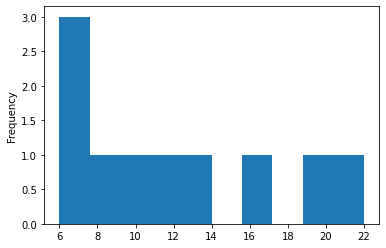

In [38]:
grp_a_times = time_spent(pdatimes)
grp_a_times.astype('timedelta64[m]').plot.hist();

**Group B**

<AxesSubplot:ylabel='Frequency'>

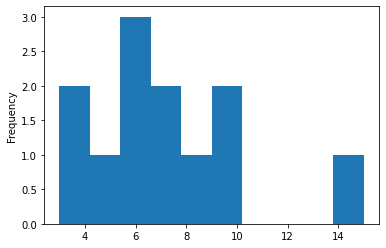

In [39]:
grp_b_times = time_spent(pdbtimes)
grp_b_times.astype('timedelta64[m]').plot.hist()

**Group C**

<AxesSubplot:ylabel='Frequency'>

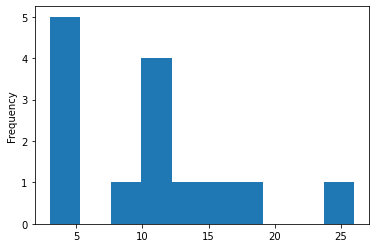

In [40]:
grp_c_times = time_spent(pdctimes)
grp_c_times.astype('timedelta64[m]').plot.hist()

In [41]:
times = pd.concat([
    pd.DataFrame({"time": grp_a_times, "group": ['a' for _ in range(len(grp_a_times))]}),
    pd.DataFrame({"time": grp_b_times, "group": ['b' for _ in range(len(grp_b_times))]}),
    pd.DataFrame({"time": grp_c_times, "group": ['c' for _ in range(len(grp_c_times))]})],
    ignore_index=True
)

In [42]:
times['minutes'] = times.time.astype('timedelta64[m]')
times['seconds'] = times.time.astype('timedelta64[s]')

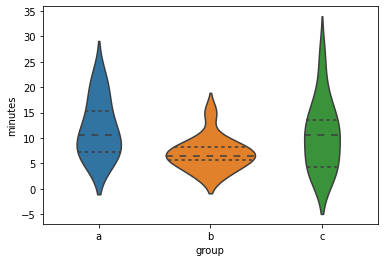

In [43]:
sns.violinplot(x="group", y="minutes", data=times, inner="quartile");

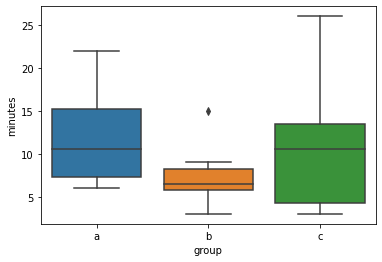

In [44]:
sns.boxplot(x="group", y="minutes", data=times);

The same, but with seconds

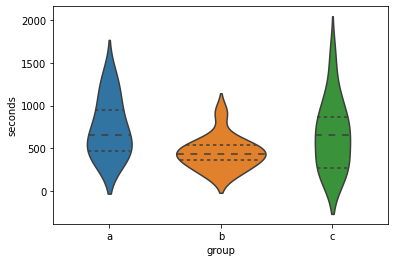

In [45]:
sns.violinplot(x="group", y="seconds", data=times, inner="quartile");

Outlier from group b

In [46]:
times[times.group == 'b'].style.highlight_max()

,time,group,minutes,seconds
10,0 days 00:05:05,b,5.000000,305.000000
11,0 days 00:03:30,b,3.000000,210.000000
12,0 days 00:15:16,b,15.000000,916.000000
13,0 days 00:09:33,b,9.000000,573.000000
14,0 days 00:08:54,b,8.000000,534.000000
15,0 days 00:06:37,b,6.000000,397.000000
16,0 days 00:06:20,b,6.000000,380.000000
17,0 days 00:03:51,b,3.000000,231.000000
18,0 days 00:07:47,b,7.000000,467.000000
19,0 days 00:09:19,b,9.000000,559.000000


In [47]:
pdbtimes.iloc[2]

t_a_before   2021-05-14 00:18:34
t_a_1        2021-05-14 00:18:11
t_a_2        2021-05-14 00:16:44
t_a_3        2021-05-14 00:16:20
t_a_4        2021-05-14 00:16:03
t_b_before   2021-05-14 00:14:47
t_b_1        2021-05-14 00:14:44
t_b_2        2021-05-14 00:13:38
t_b_3        2021-05-14 00:11:50
t_b_4        2021-05-14 00:09:46
t_c_before   2021-05-14 00:07:54
t_c_1        2021-05-14 00:07:52
t_c_2        2021-05-14 00:05:57
t_c_3        2021-05-14 00:03:47
t_c_4        2021-05-14 00:03:18
Name: 2, dtype: datetime64[ns]

His answer times are evenly distributed, he just took more time to answer.

Outlier in group C

In [48]:
times[times.group == 'c'].style.highlight_max()

,time,group,minutes,seconds
22,0 days 00:14:59,c,14.000000,899.000000
23,0 days 00:05:09,c,5.000000,309.000000
24,0 days 00:04:11,c,4.000000,251.000000
25,0 days 00:11:21,c,11.000000,681.000000
26,0 days 00:16:54,c,16.000000,1014.000000
27,0 days 00:10:32,c,10.000000,632.000000
28,0 days 00:12:01,c,12.000000,721.000000
29,0 days 00:03:30,c,3.000000,210.000000
30,0 days 00:09:27,c,9.000000,567.000000
31,0 days 00:03:40,c,3.000000,220.000000


In [49]:
pdctimes.iloc[-1]

t_a_before   2021-05-14 00:27:31
t_a_1        2021-05-14 00:27:15
t_a_2        2021-05-14 00:26:16
t_a_3        2021-05-14 00:25:52
t_a_4        2021-05-14 00:25:26
t_b_before   2021-05-14 00:23:50
t_b_1        2021-05-14 00:23:48
t_b_2        2021-05-14 00:23:26
t_b_3        2021-05-14 00:23:09
t_b_4        2021-05-14 00:22:51
t_c_before   2021-05-14 00:21:46
t_c_1        2021-05-14 00:21:43
t_c_2        2021-05-14 00:21:28
t_c_3        2021-05-14 00:21:17
t_c_4        2021-05-14 00:01:22
Name: 13, dtype: datetime64[ns]

He stopped on the last question for 20 minutes, remove this time

In [50]:
grp_c_times = grp_c_times[:-1]

In [51]:
pdctimes = pdctimes[:-1]

In [52]:
times = pd.concat([
    pd.DataFrame({"time": grp_a_times, "group": ['a' for _ in range(len(grp_a_times))]}),
    pd.DataFrame({"time": grp_b_times, "group": ['b' for _ in range(len(grp_b_times))]}),
    pd.DataFrame({"time": grp_c_times, "group": ['c' for _ in range(len(grp_c_times))]})],
    ignore_index=True
)

In [53]:
times['minutes'] = times.time.astype('timedelta64[m]')
times['seconds'] = times.time.astype('timedelta64[s]')

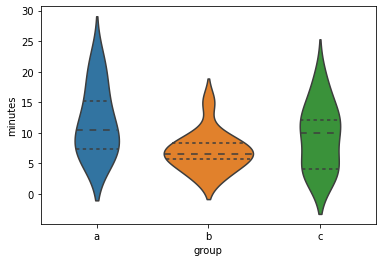

In [54]:
sns.violinplot(x="group", y="minutes", data=times, inner="quartile");

There were two other respondents that waited on explanations for about 4 minutes, it is hard to tell if they were having a break or just trying to remember explanations

In [55]:
pdctimes.iloc[-2]

t_a_before   2021-05-14 00:15:10
t_a_1        2021-05-14 00:14:52
t_a_2        2021-05-14 00:13:03
t_a_3        2021-05-14 00:12:48
t_a_4        2021-05-14 00:12:32
t_b_before   2021-05-14 00:10:19
t_b_1        2021-05-14 00:10:16
t_b_2        2021-05-14 00:08:16
t_b_3        2021-05-14 00:07:31
t_b_4        2021-05-14 00:07:02
t_c_before   2021-05-14 00:04:11
t_c_1        2021-05-14 00:04:08
t_c_2        2021-05-14 00:03:41
t_c_3        2021-05-14 00:02:52
t_c_4        2021-05-14 00:02:31
Name: 11, dtype: datetime64[ns]

In [56]:
pdctimes.iloc[4]

t_a_before   2021-05-14 00:19:14
t_a_1        2021-05-14 00:18:45
t_a_2        2021-05-14 00:16:37
t_a_3        2021-05-14 00:16:14
t_a_4        2021-05-14 00:15:36
t_b_before   2021-05-14 00:13:35
t_b_1        2021-05-14 00:12:55
t_b_2        2021-05-14 00:11:58
t_b_3        2021-05-14 00:10:28
t_b_4        2021-05-14 00:08:48
t_c_before   2021-05-14 00:04:50
t_c_1        2021-05-14 00:04:46
t_c_2        2021-05-14 00:04:10
t_c_3        2021-05-14 00:03:04
t_c_4        2021-05-14 00:02:20
Name: 4, dtype: datetime64[ns]

We will keep their times

**Let's compute on average how long it took respondents in each group to fill up the questionnaire**

In [57]:
avg_time_spent(pdatimes)

Timedelta('0 days 00:12:18.100000')

In [58]:
avg_time_spent(pdbtimes)

Timedelta('0 days 00:07:32.666666666')

In [59]:
avg_time_spent(pdctimes)

Timedelta('0 days 00:09:50')

On graphs it seems that group B has significantly lower times that group A and C, even though group C has approximately the same length of summaries as group B

---

Let's look at differences in each sector of each group. *Unfortunatelly, there was an error in the design and we can not count times for first answer in each sector, so will count only 2-4*

In [60]:
pdatimes.head(1)

,t_a_before,t_a_1,t_a_2,t_a_3,t_a_4,t_b_before,t_b_1,t_b_2,t_b_3,t_b_4,t_c_before,t_c_1,t_c_2,t_c_3,t_c_4
0,2021-05-14 00:32:19,2021-05-14 00:32:16,2021-05-14 00:31:29,2021-05-14 00:31:21,2021-05-14 00:31:09,2021-05-14 00:30:18,2021-05-14 00:30:15,2021-05-14 00:28:56,2021-05-14 00:28:45,2021-05-14 00:28:01,2021-05-14 00:25:28,2021-05-14 00:25:26,2021-05-14 00:24:07,2021-05-14 00:22:34,2021-05-14 00:21:31


In [61]:
def sector_times_avg(df):
    s1 = (df.t_a_1 - df.t_a_4).mean()
    s2 = (df.t_b_1 - df.t_b_4).mean()
    s3 = (df.t_c_1 - df.t_c_4).mean()
    
    return s1, s2, s3

def sector_times(df):
    s1 = df.t_a_1 - df.t_a_4
    s2 = df.t_b_1 - df.t_b_4
    s3 = df.t_c_1 - df.t_c_4
    
    return s1, s2, s3

In [62]:
sector_times_avg(pdatimes)

(Timedelta('0 days 00:02:31.500000'),
 Timedelta('0 days 00:02:14.900000'),
 Timedelta('0 days 00:03:17.600000'))

In [63]:
sector_times_avg(pdbtimes)

(Timedelta('0 days 00:01:24.916666666'),
 Timedelta('0 days 00:01:26.916666666'),
 Timedelta('0 days 00:01:47.583333333'))

In [64]:
sector_times_avg(pdctimes)

(Timedelta('0 days 00:01:49.615384615'),
 Timedelta('0 days 00:01:40.692307692'),
 Timedelta('0 days 00:01:50.076923076'))

In [65]:
def sector_times_frame(df, grp_letter):
    s1, s2, s3 = sector_times(df)
    
    s = list(s1)
    s.extend(list(s2))
    s.extend(list(s3))
    
    s1n = [1 for _ in range(len(s1))]
    s2n = [2 for _ in range(len(s2))]
    s3n = [3 for _ in range(len(s3))]
    
    return pd.DataFrame({
        "time": s,
        "sector": s1n + s2n + s3n,
        "group": [grp_letter for _ in range(len(s))]
    })

In [66]:
times_per_sector = pd.concat([
    sector_times_frame(pdatimes, 'a'),
    sector_times_frame(pdbtimes, 'b'),
    sector_times_frame(pdctimes, 'c')],
    ignore_index=True
)
times_per_sector.sample(2)

,time,sector,group
31,0 days 00:00:51,1,b
34,0 days 00:01:30,1,b


In [67]:
times_per_sector["time_s"] = times_per_sector["time"].astype('timedelta64[s]')

In [68]:
times_per_sector.sample(1)

,time,sector,group,time_s
23,0 days 00:02:05,3,a,125.0


<AxesSubplot:xlabel='sector', ylabel='time_s'>

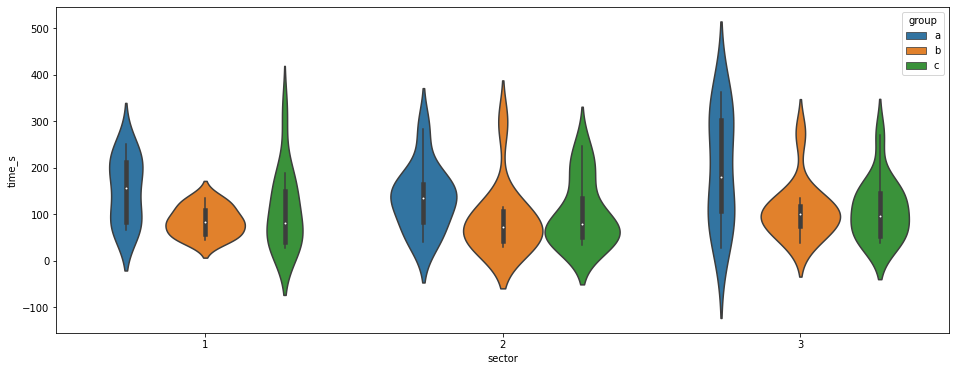

In [69]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='sector', y='time_s', data=times_per_sector, hue='group')

<AxesSubplot:xlabel='sector', ylabel='time_s'>

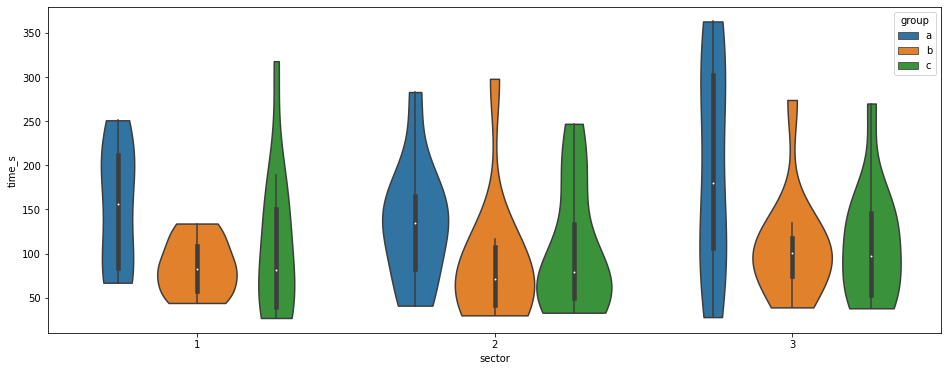

In [70]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='sector', y='time_s', data=times_per_sector, hue='group', cut=0)

<AxesSubplot:xlabel='group', ylabel='time_s'>

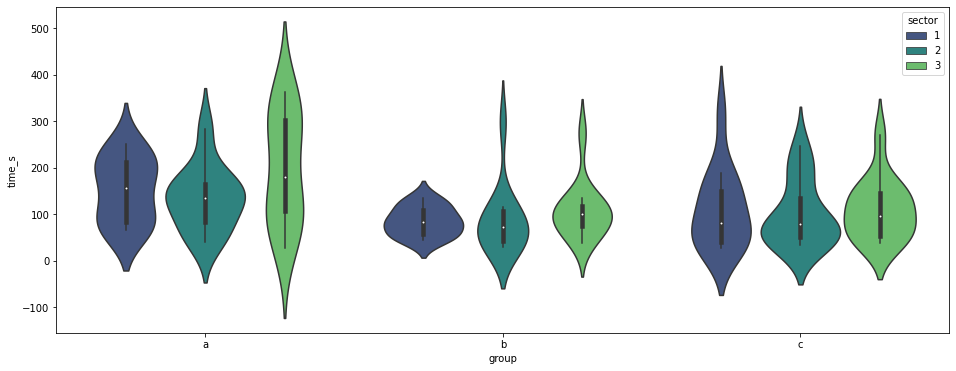

In [71]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='group', y='time_s', data=times_per_sector, hue='sector', palette='viridis')

It seems that seeing an explanation made participants think more before continuing. Let's see diference between sector 2 and 3

<AxesSubplot:xlabel='group', ylabel='time_s'>

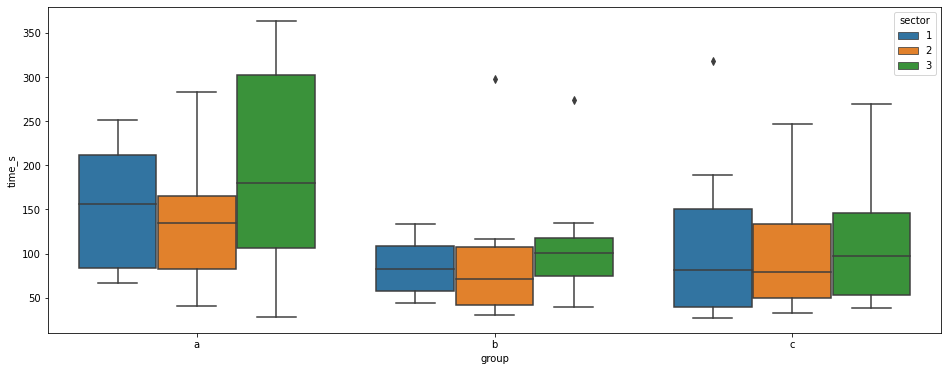

In [72]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="group", y="time_s", data=times_per_sector, hue="sector")

<AxesSubplot:xlabel='sector', ylabel='time_s'>

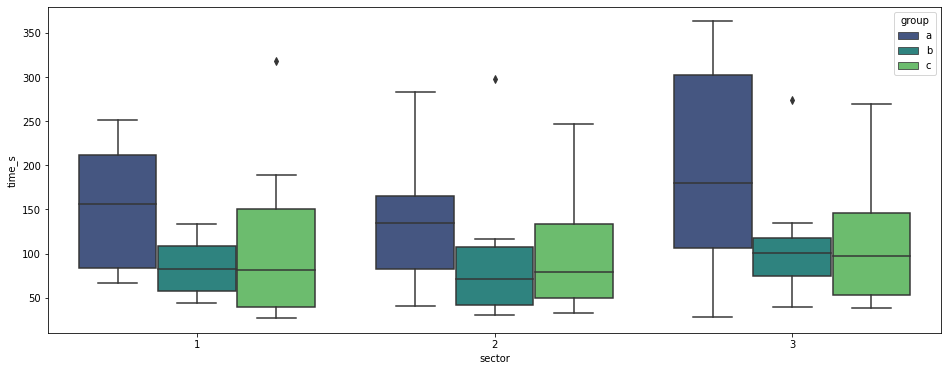

In [73]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="sector", y="time_s", data=times_per_sector, hue="group", palette='viridis')

In [74]:
sector_times_avg(pdatimes)

(Timedelta('0 days 00:02:31.500000'),
 Timedelta('0 days 00:02:14.900000'),
 Timedelta('0 days 00:03:17.600000'))

In [75]:
sector_times_avg(pdbtimes)

(Timedelta('0 days 00:01:24.916666666'),
 Timedelta('0 days 00:01:26.916666666'),
 Timedelta('0 days 00:01:47.583333333'))

In [76]:
sector_times_avg(pdctimes)

(Timedelta('0 days 00:01:49.615384615'),
 Timedelta('0 days 00:01:40.692307692'),
 Timedelta('0 days 00:01:50.076923076'))

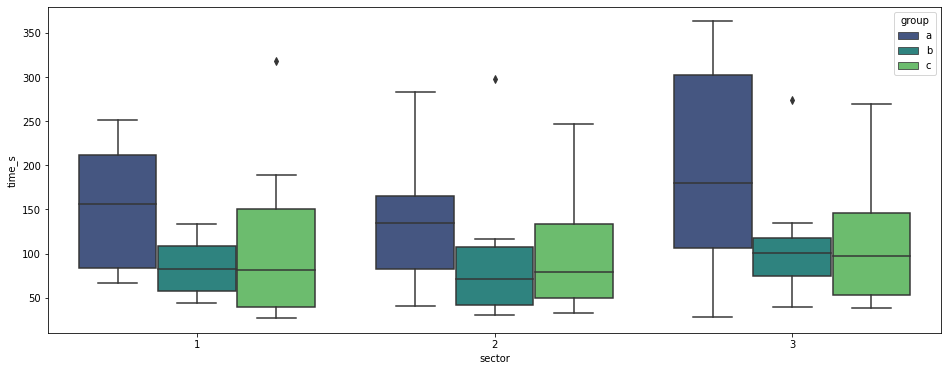

In [77]:
plt.figure(figsize=(16, 6))
sns.boxplot(x="sector", y="time_s", data=times_per_sector, hue="group", palette='viridis');

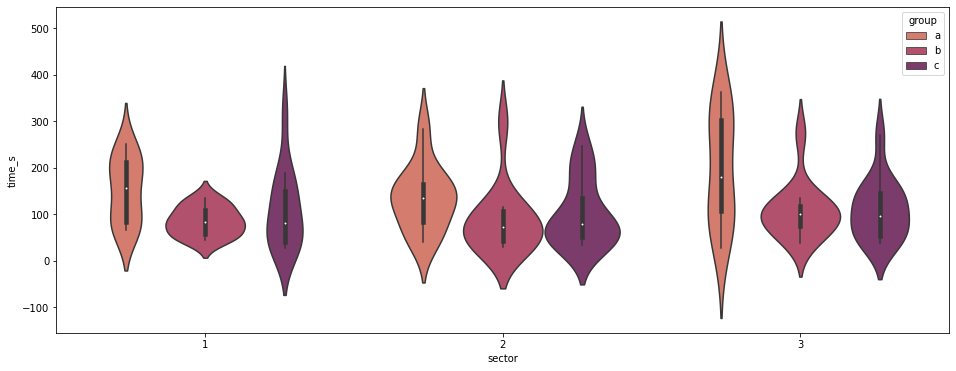

In [78]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='sector', y='time_s', data=times_per_sector, hue='group', palette='flare');

Plot trends

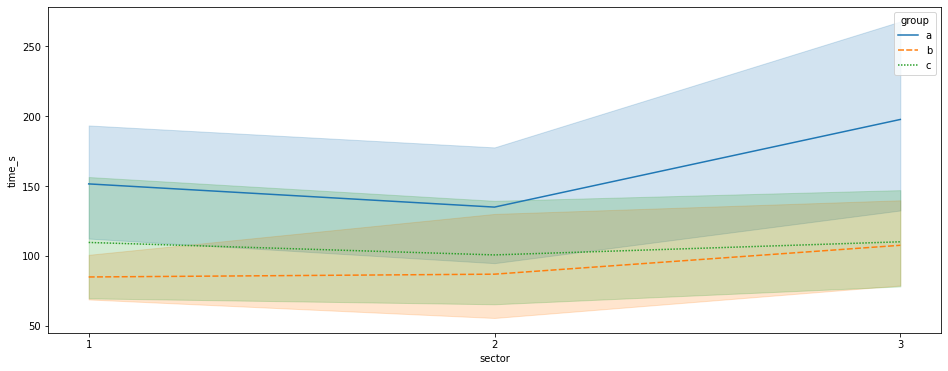

In [79]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="sector", y="time_s", data=times_per_sector, style="group", hue="group");
plt.xticks([1,2,3]);

<Figure size 1584x504 with 0 Axes>

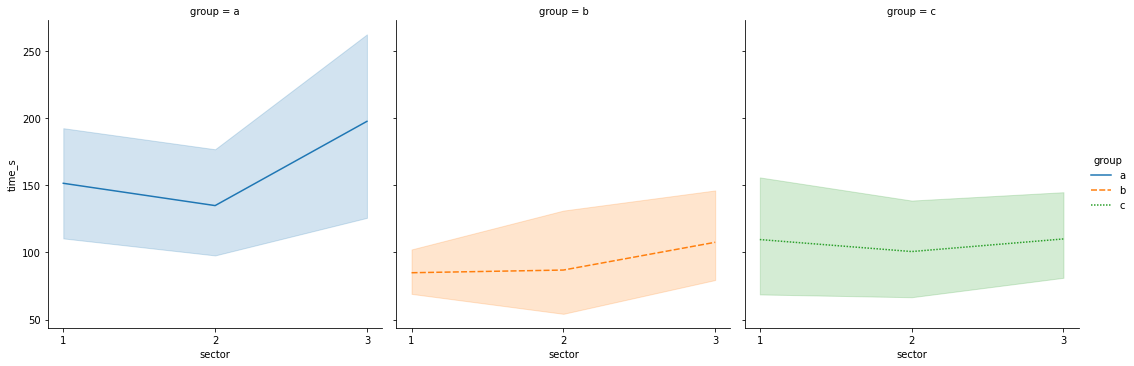

In [80]:
plt.figure(figsize=(22, 7))
p = sns.relplot(
    data=times_per_sector, x="sector", y="time_s",
    col="group", hue="group", style="group",
    kind="line"
);

plt.xticks([1,2,3]);

---

Let's use statistics!
 - compare times to fill in each category, check if there is significant difference between A and B, B and C
 - compare times to fill each sector, check if there is significant difference between baseline (no explanation) and when shown explanation

**3rd Hypothesis: Extractive summary with Importance factor leads one to quicker understanding of the model in comparison to seeing an entire instance without explanation.**

Interesting outcome from above charts is that explanations led users to spend more time predicting model behavior

In [81]:
# lets check the distribution of times in group A, B and C

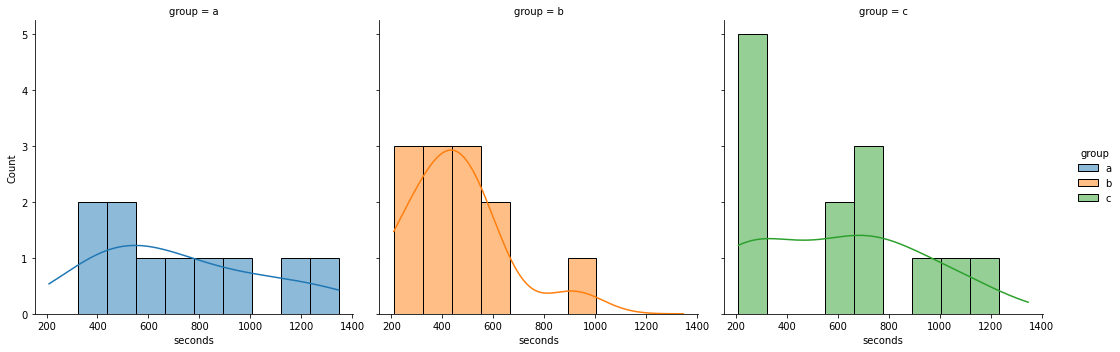

In [82]:
sns.displot(x="seconds", data=times, hue="group", col="group", kind="hist", kde=True, bins=10)

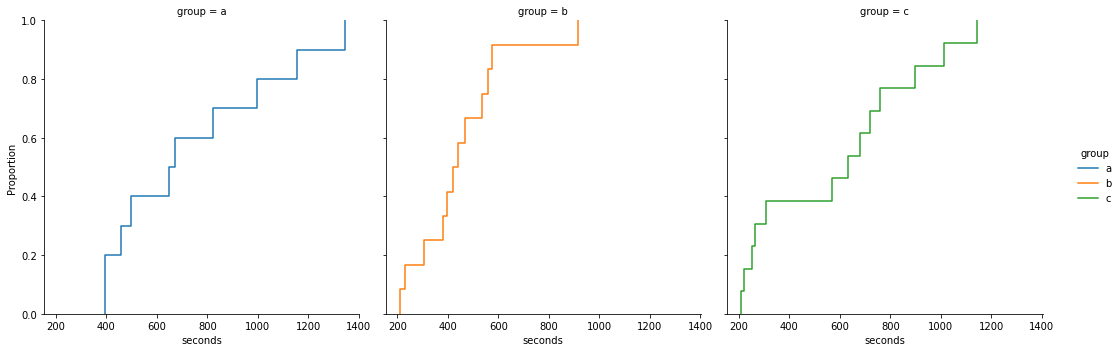

In [83]:
sns.displot(x="seconds", data=times, hue="group", col="group", kind="ecdf")

<AxesSubplot:xlabel='group', ylabel='seconds'>

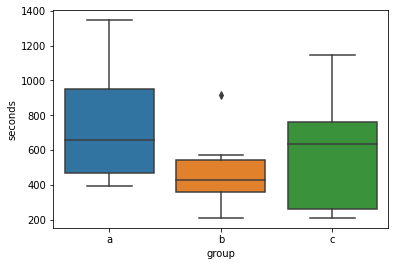

In [84]:
sns.boxplot(x="group", y="seconds", data=times)

In [85]:
alpha = 0.05

# H0 - data comes from Gaussian distribution
# H1 - not H0

stat, p1 = st.shapiro(times.seconds.loc[times.group=='a'])
stat, p2 = st.shapiro(times.seconds.loc[times.group=='b'])
stat, p3 = st.shapiro(times.seconds.loc[times.group=='c'])

In [86]:
def interpret_stat_normality(pr, grp):
    if pr > alpha:
        print(f'Group {grp}: Failed to reject H0, data looks Gaussian')
    else:
        print(f'Group {grp}: Rejected H0, data does not look Gaussian')

In [87]:
interpret_stat_normality(p1, 'A')

Group A: Failed to reject H0, data looks Gaussian


In [88]:
interpret_stat_normality(p2, 'B')

Group B: Failed to reject H0, data looks Gaussian


In [89]:
interpret_stat_normality(p3, 'C')

Group C: Failed to reject H0, data looks Gaussian


We could not reject H0 hypothesis about Gaussian distribution for groups, lets check variances

In [91]:
# H0: variance of data in groups A and B are the same
# H1: not H0

s, p = st.levene(times.seconds.loc[times.group=='a'], times.seconds.loc[times.group=='b'])
s, p

(3.237734704443021, 0.0870672598565643)

In [92]:
p > alpha

True

Based on the data we do not reject H0 and can not tell that data from both groups have distributions with different variances

In [94]:
# H0: variance of data in groups B and C are the same
# H1: not H0

s, p = st.levene(times.seconds.loc[times.group=='b'], times.seconds.loc[times.group=='c'])
s, p

(4.5898819604249255, 0.04297533410478199)

In [95]:
p > alpha

False

Based on the data we do reject H0 and can not tell that data from both groups have distributions with same variances

We will continue with 2 samples T-Tests for group AB and use not parametric test for BC

In [90]:
s = st.ttest_ind(a=times.seconds.loc[times.group=='a'], b=times.seconds.loc[times.group=='b'], equal_var=False)
s

Ttest_indResult(statistic=2.4029050701571704, pvalue=0.031192757463605673)

In [91]:
stat, p = s

In [92]:
# H0 time to fill questionnaire has the same distribution in group A and B (there is not significant difference between groups)
# H1 not H0

In [93]:
p

0.031192757463605673

In [94]:
p > alpha

False

We reject hypothesis H0, we can not say that the groups have the same distribution. We can moreover perform one sided test to see if data are greater or lower

In [95]:
p/2 < alpha and stat > 0 #  if stat > 0 data with argument a are greater, otherwise lower

True

Based on the 2 sampled ttest, there is a significant difference between time it took participants in group A and B to fill up the questionnaire. Times in group A are significantly higher.

Now lets compare groups B and C to see if the difference is due to shorter texts

In [119]:
# H0 time to fill questionnaire has the same distribution in group B and C
# H1 not H0

In [120]:
# s = st.ttest_ind(a=times.seconds.loc[times.group=='b'], b=times.seconds.loc[times.group=='c'], equal_var=False)
# s

In [121]:
# stat, p = s

In [122]:
# p

In [123]:
# p > alpha

In [124]:
s, p = st.mannwhitneyu(times.seconds.loc[times.group=='b'], times.seconds.loc[times.group=='c'])
s, p

(58.5, 0.15064697150369655)

In [125]:
p > alpha

True

We can not reject hypothesis H0, can not tell that difference between time it took participants in group B and C to fill up the questionnaire is significant.

---

We now compare sectors

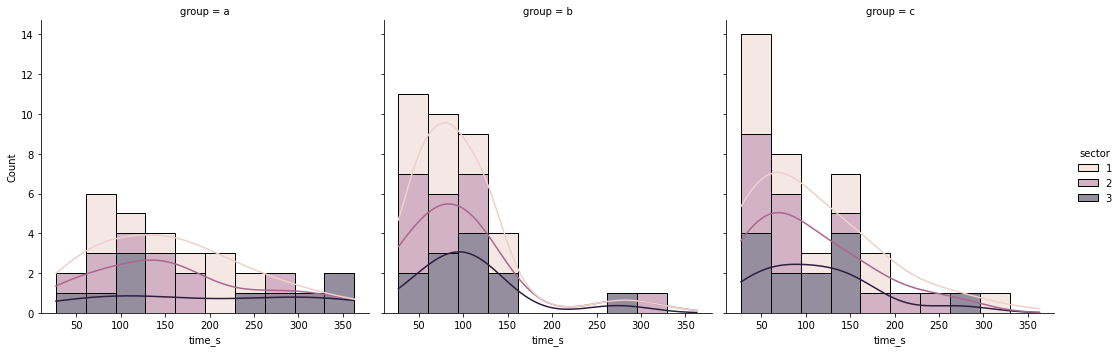

In [126]:
sns.displot(x="time_s", data=times_per_sector, col="group", hue="sector", kde=True, multiple="stack")

**TODO: Maybe evaluate time spent between sectors, for fun fact**

---
---

## Compare answers in sectors

Users had to predict behavior of the model in 3 sectors, in each they were asked to predict 4 instances. **0 is Atheism, 1 is Christianity**

In [127]:
pda.sample(1)

,technical_background,first_time,t_a_before,q1,t_a_1,q2,t_a_2,q3,t_a_3,q4,...,t_c_3,q12,t_c_4,Have you looked differently at texts after seeing explanations?,How much did the explanations affect your later predictions?,Do you think that you understand the model more after seeing explanations than before seeing them?,"After seeing explanations, do you trust the model's decisions more or less?","To better understand the model, would you prefer shorter or longer texts than those provided?","Have you spot some mistakes of the model (places where it makes bad decisions)? If you did, try to describe them",Place for your feedback
11,"Yes, I am familiar","No, I have already filled up this questionnair...",Time taken to fill form: 00:06:13,Atheism,Time taken to fill form: 00:06:11,Christianity,Time taken to fill form: 00:05:54,Christianity,Time taken to fill form: 00:05:39,Christianity,...,Time taken to fill form: 00:03:26,Christianity,Time taken to fill form: 00:03:21,7,8,8,5,5,"For example, I think testament don't have any ...",NaN


In [128]:
anscols = [f'q{i}' for i in range(1, 13)]

In [129]:
pdaans = pda[anscols].reset_index(drop=True)
pdbans = pdb[anscols]
pdcans = pdc[anscols]

In [130]:
pdaans

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,I do not know,Atheism,Christianity,I do not know,Christianity
1,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Christianity,Atheism,Atheism,Christianity,Christianity
2,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Atheism,Atheism,Christianity
3,Atheism,Atheism,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Christianity,Christianity,Atheism,Christianity
4,Atheism,Christianity,I do not know,Christianity,Christianity,Christianity,Atheism,I do not know,Christianity,Atheism,Atheism,I do not know
5,Atheism,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Christianity,Atheism,Christianity,Atheism,Christianity
6,Atheism,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Christianity,Christianity,Atheism,Atheism,Atheism
7,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Christianity,Atheism,Christianity
8,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Christianity,Atheism,Christianity
9,I do not know,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,I do not know,Atheism,Atheism,Atheism,Atheism


In [131]:
pdbans

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Christianity,Atheism,Christianity
1,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,I do not know,I do not know,Christianity,Christianity,Christianity
2,Atheism,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Atheism,Atheism,Atheism,Christianity
3,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Atheism,Atheism,Christianity
4,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,I do not know,Atheism,I do not know,I do not know,Christianity
5,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Atheism,Atheism,Christianity
6,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Christianity,Christianity,Atheism,Christianity
7,Atheism,Christianity,Christianity,Atheism,Christianity,Christianity,Atheism,Atheism,Atheism,Christianity,Atheism,Christianity
8,I do not know,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Atheism,Christianity,Atheism,Christianity
9,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Atheism,Atheism,Christianity


In [132]:
pdcans

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
0,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Christianity,Atheism,Christianity
1,Atheism,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Atheism,Atheism,Atheism,Christianity
2,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Christianity,Atheism,Atheism
3,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Christianity,Atheism,Christianity
4,I do not know,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Christianity,I do not know,Christianity
5,I do not know,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,I do not know,Atheism,Christianity,I do not know,Christianity
6,Atheism,Christianity,Christianity,Christianity,Christianity,I do not know,Atheism,Christianity,Atheism,Atheism,Atheism,Christianity
7,Christianity,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Atheism,Atheism,Atheism,Atheism,Atheism
8,Atheism,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,I do not know,Atheism,Christianity,I do not know,I do not know
9,I do not know,Christianity,Christianity,Christianity,Christianity,Christianity,Atheism,Christianity,Atheism,Christianity,I do not know,Christianity


**Value counts**

In [133]:
def melt_classes(df, group_letter):
    df = df.melt(ignore_index=True, value_name="class")
    return pd.DataFrame({
        "class": df['class'],
        "group": [group_letter for _ in range(df.shape[0])]
    })

In [134]:
ansda = melt_classes(pdaans, 'a')
ansda['class'].value_counts()

Christianity     77
Atheism          48
I do not know     7
Name: class, dtype: int64

7 times in group A someone selected I do not know

In [135]:
ansdb = melt_classes(pdbans, 'b')
ansdb['class'].value_counts()

Christianity     90
Atheism          47
I do not know     7
Name: class, dtype: int64

The same in group B

In [136]:
ansdc = melt_classes(pdcans, 'c')
ansdc['class'].value_counts()

Christianity     98
Atheism          56
I do not know    14
Name: class, dtype: int64

In group C it was 14 times

In [137]:
ans = pd.concat([ansda, ansdb, ansdc])

<Figure size 1152x720 with 0 Axes>

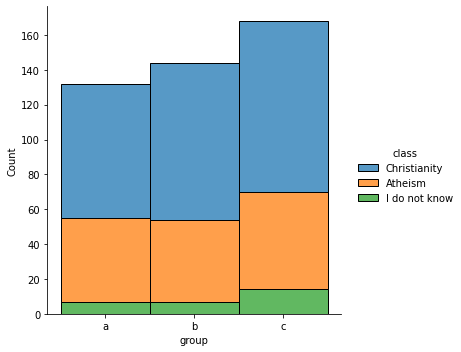

In [138]:
plt.figure(figsize=(16, 10))
sns.displot(x="group", data=ans, hue="class", multiple="stack");

<Figure size 1152x720 with 0 Axes>

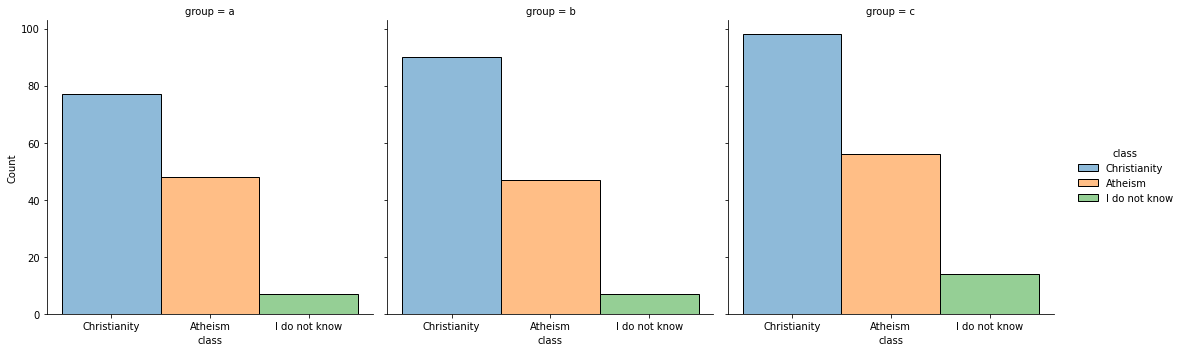

In [139]:
plt.figure(figsize=(16, 10))
sns.displot(x="class", data=ans, hue="class", col="group");

In group C there were double the amount of *I do not know*s

**Correct answers**

Convert labels, 0 - Atheism, 1 - Christianity, -1 - I do not know

In [140]:
true_mask = [ # true ~ what model predicted
    1,1,1,1,  # sector 1
    1,0,0,0,  # sector 2
    0,1,1,1,  # sector 3
]

In [141]:
def replace_labels(df):
    return df.replace(to_replace={
        "Christianity": 1,
        "Atheism": 0,
        "I do not know": -1
    })

In [142]:
pdaans = replace_labels(pdaans)
pdbans = replace_labels(pdbans)
pdcans = replace_labels(pdcans)
pdaans.sample(1)

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12
7,0,1,1,1,1,1,0,1,0,1,0,1


In [143]:
def correct_per_sector(df, group_letter):
    results = df == true_mask

    s1 = results.iloc[:, 0:4].sum().sum() / results.iloc[:, 0:4].size
    s2 = results.iloc[:, 4:8].sum().sum() / results.iloc[:, 4:8].size
    s3 = results.iloc[:, 8:12].sum().sum() / results.iloc[:, 8:12].size
    
    return pd.DataFrame({
        "accuracy": [s1, s2, s3],
        "sector": [1, 2, 3],
        "group": [group_letter for _ in range(3)]
    })

In [144]:
results_per_sector = pd.concat([
    correct_per_sector(pdaans, 'a'),
    correct_per_sector(pdbans, 'b'),
    correct_per_sector(pdcans, 'c')],
    ignore_index=True
)

In [145]:
results_per_sector.sample(1)

,accuracy,sector,group
7,0.607143,2,c


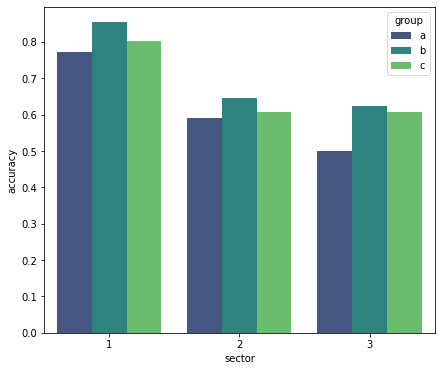

In [146]:
plt.figure(figsize=(7, 6));
sns.barplot(x="sector", y="accuracy", data=results_per_sector, hue="group", palette='viridis');


<Figure size 504x432 with 0 Axes>

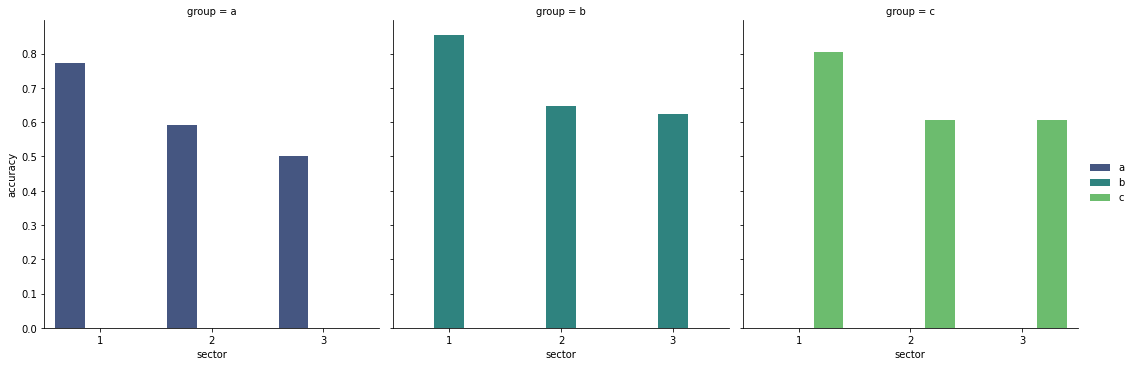

In [147]:
plt.figure(figsize=(7, 6));
g=sns.catplot(x="sector", y="accuracy", data=results_per_sector, hue="group", palette='viridis', kind="bar", col="group");
g.add_legend();

<Figure size 504x432 with 0 Axes>

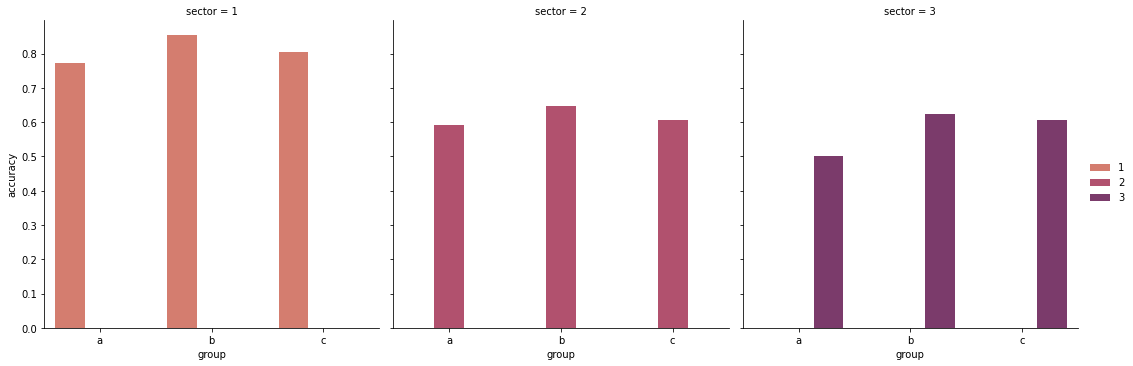

In [148]:
plt.figure(figsize=(7, 6));
g = sns.catplot(x="group", y="accuracy", data=results_per_sector, col="sector", kind="bar", palette='flare', hue="sector");
g.add_legend();

**Same statistics, but now *I do not know* is not counted as wrong answer**

In [149]:
def acc_per_sector_without_idk(df, group_letter):
    correct = df == true_mask
    idk_mask = df == -1

    s1 = correct.iloc[:, 0:4].sum().sum()
    s1idk = correct.iloc[:, 0:4].size - idk_mask.sum()[0:4].sum()
    idks1 = idk_mask.sum()[0:4].sum() / correct.iloc[:, 0:4].size
    
    s2 = correct.iloc[:, 4:8].sum().sum()
    s2idk = correct.iloc[:, 4:8].size - idk_mask.sum()[4:8].sum()
    idks2 = idk_mask.sum()[4:8].sum() / correct.iloc[:, 0:4].size
    
    s3 = correct.iloc[:, 8:12].sum().sum()
    s3idk = correct.iloc[:, 8:12].size - idk_mask.sum()[8:12].sum()
    idks3 = idk_mask.sum()[8:12].sum() / correct.iloc[:, 0:4].size
    
    return pd.DataFrame({
        "accuracy": [s1 / s1idk, s2 / s2idk, s3 / s3idk],
        "sector": [x for x in range(1,4)],
        "group": [group_letter for _ in range(3)],
        "idks_dist": [idks1, idks2, idks3]
    })

def acc_without_idk(df, group_letter):
    correct = df == true_mask
    idk_mask = df == -1

    c = correct.sum(axis=1)
    idks = idk_mask.sum(axis=1)
    cwidk = correct.loc[1].size - idk_mask.sum(axis=1)
    
    return pd.DataFrame({
        "accuracy": c / cwidk,
        "group": [group_letter for _ in range(len(df))],
        "idks_dist": idks / correct.loc[1].size
    })

def acc_per_sector_without_idk_sep(df, group_letter):
    correct = df == true_mask
    idk_mask = df == -1

    s1 = correct.iloc[:, 0:4].sum(axis=1)
    s1idk = 4 - idk_mask.iloc[:, 0:4].sum(axis=1)
    s1 = s1 / s1idk
    idks1 = idk_mask.iloc[:, 0:4].sum(axis=1) / 4
    
    s2 = correct.iloc[:, 4:8].sum(axis=1) / (4 - idk_mask.iloc[:, 4:8].sum(axis=1))
    idks2 = idk_mask.iloc[:, 4:8].sum(axis=1) / 4
    
    s3 = correct.iloc[:, 8:12].sum(axis=1) / (4 - idk_mask.iloc[:, 8:12].sum(axis=1))
    idks3 = idk_mask.iloc[:, 8:12].sum(axis=1) / 4

    return pd.DataFrame({
        "accuracy": np.concatenate([s1, s2, s3]),
        "sector": [1 for x in range(len(s1))] + [2 for x in range(len(s2))] + [3 for x in range(len(s3))],
        "group": [group_letter for _ in range(len(s1)*3)],
        "idks_dist": np.concatenate([idks1, idks2, idks3])
    })

In [150]:
results_sector_acc = pd.concat([
    acc_per_sector_without_idk(pdaans, 'a'),
    acc_per_sector_without_idk(pdbans, 'b'),
    acc_per_sector_without_idk(pdcans, 'c')
])

<AxesSubplot:xlabel='group', ylabel='accuracy'>

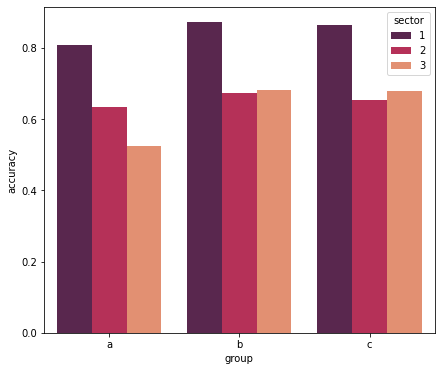

In [151]:
plt.figure(figsize=(7, 6));
sns.barplot(x="group", y="accuracy", data=results_sector_acc, hue="sector", palette="rocket")

<AxesSubplot:xlabel='group', ylabel='accuracy'>

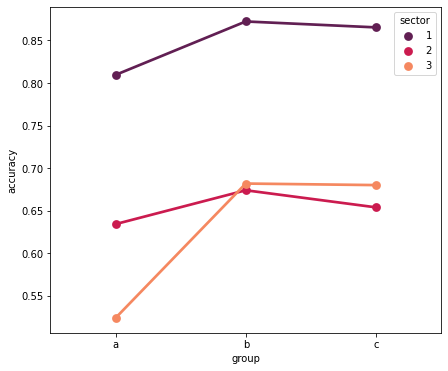

In [152]:
plt.figure(figsize=(7, 6));
sns.pointplot(x="group", y="accuracy", data=results_sector_acc, hue="sector", palette="rocket")

<AxesSubplot:xlabel='sector', ylabel='accuracy'>

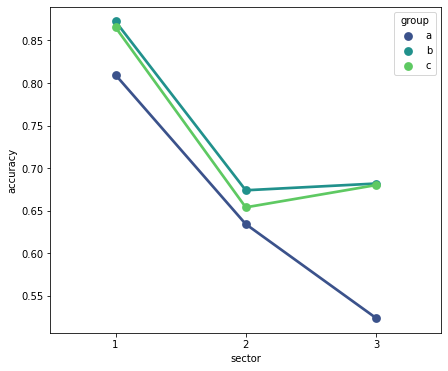

In [153]:
plt.figure(figsize=(7, 6));
sns.pointplot(x="sector", y="accuracy", data=results_sector_acc, hue="group", palette='viridis')

In [154]:
times.loc[times.group=='c'].mean()

time       0 days 00:09:50
minutes            9.38462
seconds                590
dtype: object

Amount of I do not know's

<AxesSubplot:xlabel='sector', ylabel='idks_dist'>

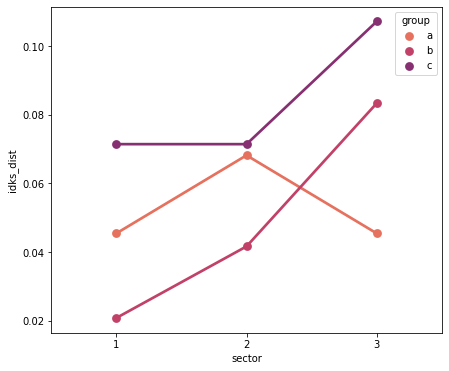

In [155]:
plt.figure(figsize=(7, 6));
sns.pointplot(x="sector", y="idks_dist", data=results_sector_acc, hue="group", palette="flare")

---

**Statistical tests**

**Hypothesis 2: With use of an Importance factor in an extractive summary,one can better understand a model, i.  e.  precision and coverage metricswill be statistically more significant than in Anchors or LIME.**

In [156]:
results_woidk = pd.concat([
    acc_without_idk(pdaans, 'a'),
    acc_without_idk(pdbans, 'b'),
    acc_without_idk(pdcans, 'c')],
    ignore_index=True
) 
results_woidk.sample(2)

,accuracy,group,idks_dist
30,0.666667,c,0.00
15,0.888889,b,0.25


Lets first check distribution across groups

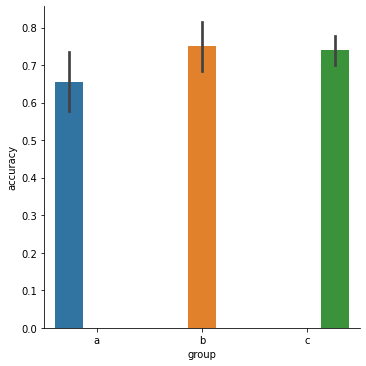

In [157]:
sns.catplot(x="group", y="accuracy", data=results_woidk, hue="group", kind="bar")

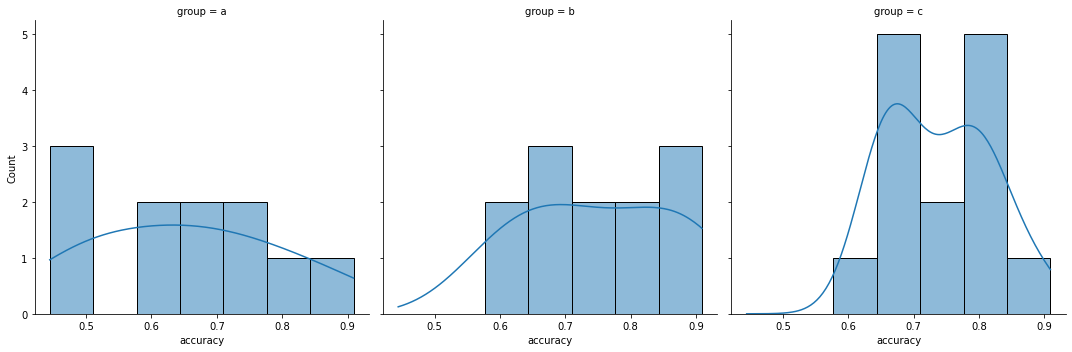

In [158]:
sns.displot(kind="hist", col="group", x="accuracy", kde=True, data=results_woidk)

In [159]:
# H0: data from group A, B, B come from gaussian distribution
# H1: not H0

s, p1 = st.shapiro(results_woidk.accuracy.loc[results_woidk.group == 'a'])
s, p2 = st.shapiro(results_woidk.accuracy.loc[results_woidk.group == 'b'])
s, p3 = st.shapiro(results_woidk.accuracy.loc[results_woidk.group == 'c'])

In [160]:
interpret_stat_normality(p1, 'a')

Group a: Failed to reject H0, data looks Gaussian


In [161]:
interpret_stat_normality(p2, 'b')

Group b: Failed to reject H0, data looks Gaussian


In [162]:
interpret_stat_normality(p3, 'c')

Group c: Failed to reject H0, data looks Gaussian


Data are from normal distribution, we proceed with variance test

In [163]:
# H0: variance of data in groups A and B are the same
# H1: not H0

s, p = st.levene(results_woidk.accuracy.loc[results_woidk.group == 'a'], results_woidk.accuracy.loc[results_woidk.group == 'b'])
s, p

(0.33905636387720384, 0.5665742380336528)

In [164]:
p > alpha

True

Based on the data we do not reject H0 and can not tell that data from both groups have distributions with different variances

Repeat the test for group B and C

In [165]:
# H0: variance of data in groups B and C are the same
# H1: not H0

s, p = st.levene(results_woidk.accuracy.loc[results_woidk.group == 'b'], results_woidk.accuracy.loc[results_woidk.group == 'c'])
s, p

(2.6411573699818556, 0.11718924695295231)

In [166]:
p > alpha

True

Based on the data we do not reject H0 and can not tell that data from both groups have distributions with different variances

We can now proceed to 2 samples ttest

In [167]:
# H0 accuracy of participants in groups A and B does not have significant difference
# H1 not H0

s = st.ttest_ind(a=results_woidk.accuracy.loc[results_woidk.group == 'a'], b=results_woidk.accuracy.loc[results_woidk.group == 'b'], equal_var=False)
stat, p = s
s

Ttest_indResult(statistic=-1.7504960425098288, pvalue=0.09583555868011198)

In [168]:
p

0.09583555868011198

In [169]:
p > alpha

True

We do not reject hypothesis H0, we can not tell that data have significantly different distributions

**Bonus** do the same for BC

In [170]:
# H0 accuracy of participants in groups B and C does not have significant difference
# H1 not H0

s = st.ttest_ind(a=results_woidk.accuracy.loc[results_woidk.group == 'b'], b=results_woidk.accuracy.loc[results_woidk.group == 'c'], equal_var=False)
stat, p = s
s

Ttest_indResult(statistic=0.3050685104675316, pvalue=0.7636928148624774)

In [171]:
p

0.7636928148624774

In [172]:
p > alpha

True

We do not reject hypothesis H0, we can not tell that data have significantly different distributions

---

In [173]:
results_sep = pd.concat([
    acc_per_sector_without_idk_sep(pdaans, 'a'),
    acc_per_sector_without_idk_sep(pdbans, 'b'),
    acc_per_sector_without_idk_sep(pdcans, 'c')],
    ignore_index=True
)

In [174]:
results_sep.sample(2)

,accuracy,sector,group,idks_dist
6,0.75,1,a,0.0
13,0.75,2,a,0.0


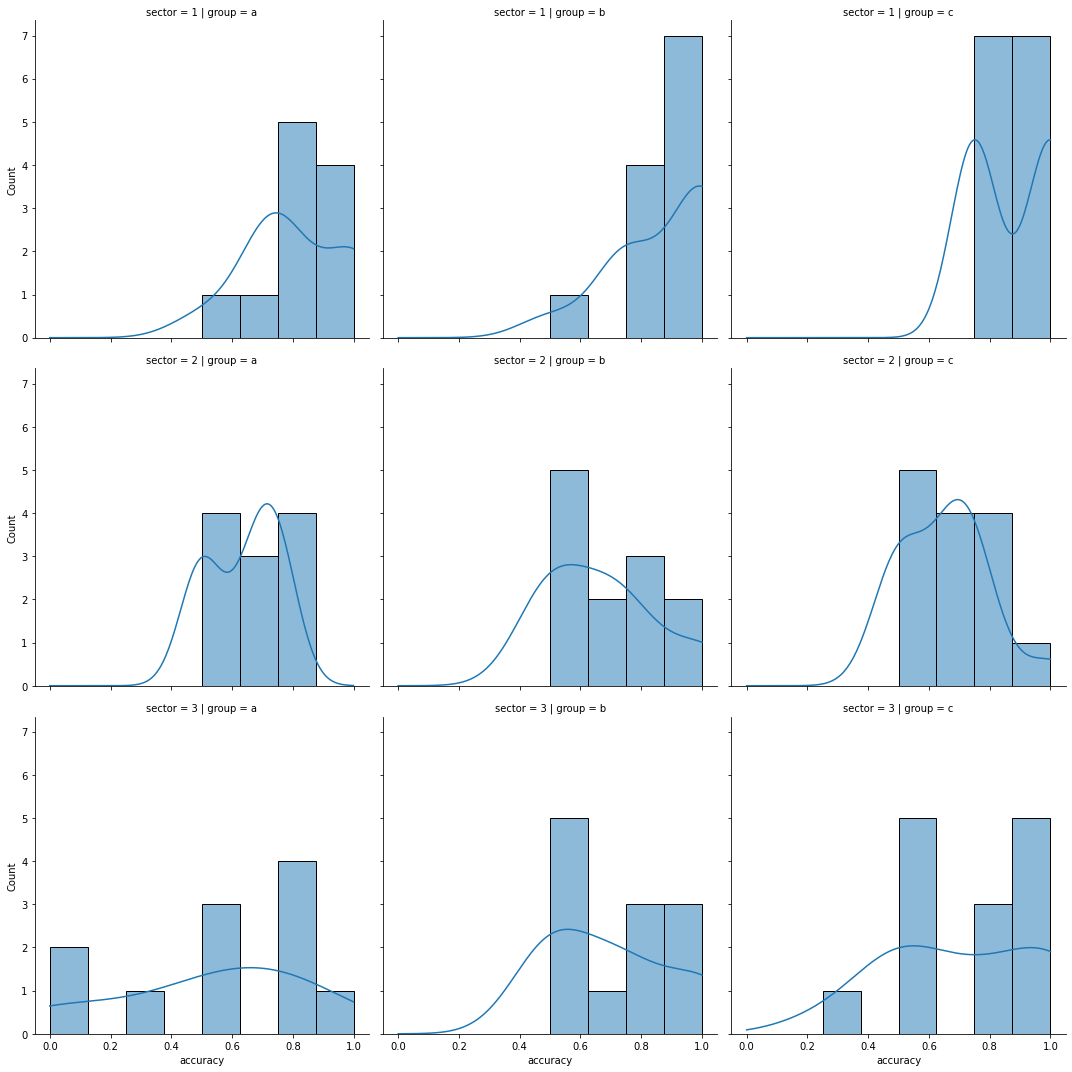

In [175]:
sns.displot(kind="hist", col="group", x="accuracy", row="sector", kde=True, data=results_sep)

Get change of accuracy between sectors in each group

In [176]:
def acc_per_sector_without_idk_sep_v2(df, group_letter):
    correct = df == true_mask
    idk_mask = df == -1

    s1 = correct.iloc[:, 0:4].sum(axis=1)
    s1idk = 4 - idk_mask.iloc[:, 0:4].sum(axis=1)
    s1 = s1 / s1idk
    idks1 = idk_mask.iloc[:, 0:4].sum(axis=1) / 4
    
    s2 = correct.iloc[:, 4:8].sum(axis=1) / (4 - idk_mask.iloc[:, 4:8].sum(axis=1))
    idks2 = idk_mask.iloc[:, 4:8].sum(axis=1) / 4
    
    s3 = correct.iloc[:, 8:12].sum(axis=1) / (4 - idk_mask.iloc[:, 8:12].sum(axis=1))
    idks3 = idk_mask.iloc[:, 8:12].sum(axis=1) / 4
    
    s12 = s2 - s1
    s23 = s3 - s2
    
    return pd.DataFrame({
        "accuracy_change": np.concatenate([s12, s23]),
        "sector": ["acc diff between groups 1 and 2" for x in range(len(s1))] + ["acc diff between groups 2 and 3" for x in range(len(s2))],
        "group": [group_letter for _ in range(len(s1)*2)],
        "idks_dist": np.concatenate([idks1, idks2])
    })

def acc_per_sector_without_idk_sep_v2_relative(df, group_letter):
    correct = df == true_mask
    idk_mask = df == -1

    s1 = correct.iloc[:, 0:4].sum(axis=1)
    s1idk = 4 - idk_mask.iloc[:, 0:4].sum(axis=1)
    s1 = s1 / s1idk
    idks1 = idk_mask.iloc[:, 0:4].sum(axis=1) / 4
    
    s2 = correct.iloc[:, 4:8].sum(axis=1) / (4 - idk_mask.iloc[:, 4:8].sum(axis=1))
    idks2 = idk_mask.iloc[:, 4:8].sum(axis=1) / 4
    
    s3 = correct.iloc[:, 8:12].sum(axis=1) / (4 - idk_mask.iloc[:, 8:12].sum(axis=1))
    idks3 = idk_mask.iloc[:, 8:12].sum(axis=1) / 4
    
    s12 = (s2 - s1) / s1
    s23 = (s3 - s2) / s2
    
    return pd.DataFrame({
        "accuracy_change": np.concatenate([s12, s23]),
        "sector": ["acc diff between groups 1 and 2" for x in range(len(s1))] + ["acc diff between groups 2 and 3" for x in range(len(s2))],
        "group": [group_letter for _ in range(len(s1)*2)],
        "idks_dist": np.concatenate([idks1, idks2])
    })


In [177]:
results_sep_dif = pd.concat([
    acc_per_sector_without_idk_sep_v2(pdaans, 'a'),
    acc_per_sector_without_idk_sep_v2(pdbans, 'b'),
    acc_per_sector_without_idk_sep_v2(pdcans, 'c')],
    ignore_index=True
)

In [178]:
results_sep_dif.sample(2)

,accuracy_change,sector,group,idks_dist
58,0.00,acc diff between groups 1 and 2,c,0.0
24,0.25,acc diff between groups 1 and 2,b,0.0


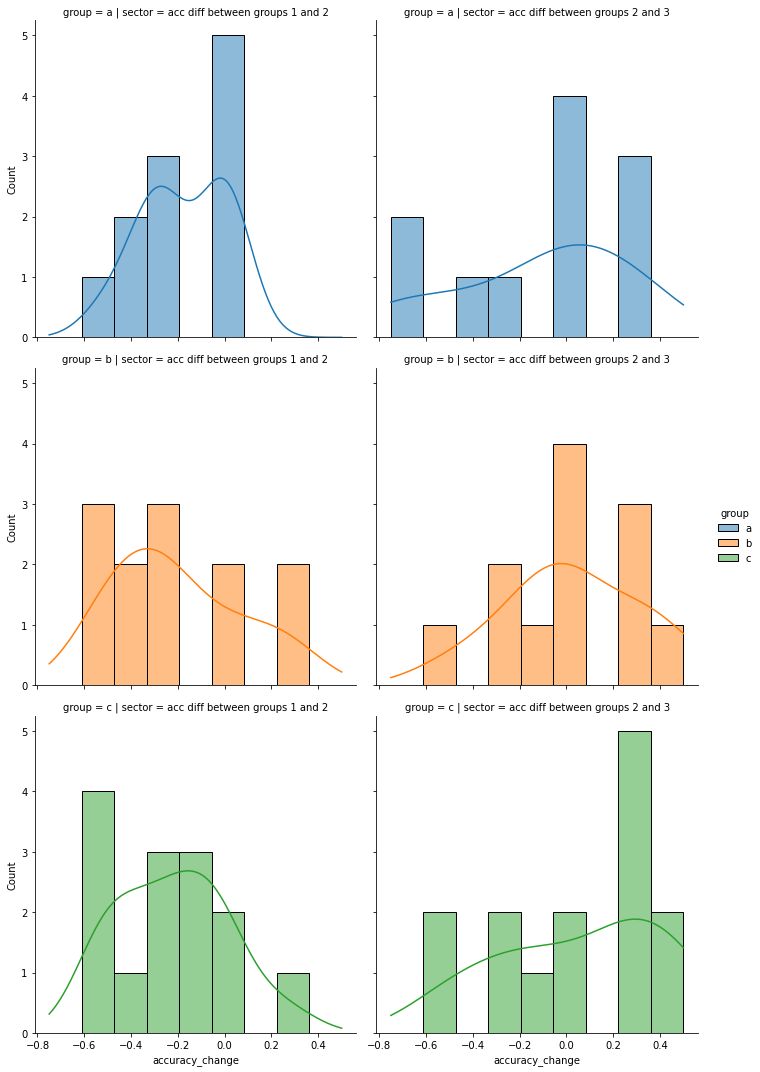

In [179]:
sns.displot(kind="hist", col="sector", x="accuracy_change", row="group", kde=True, data=results_sep_dif, hue="group");

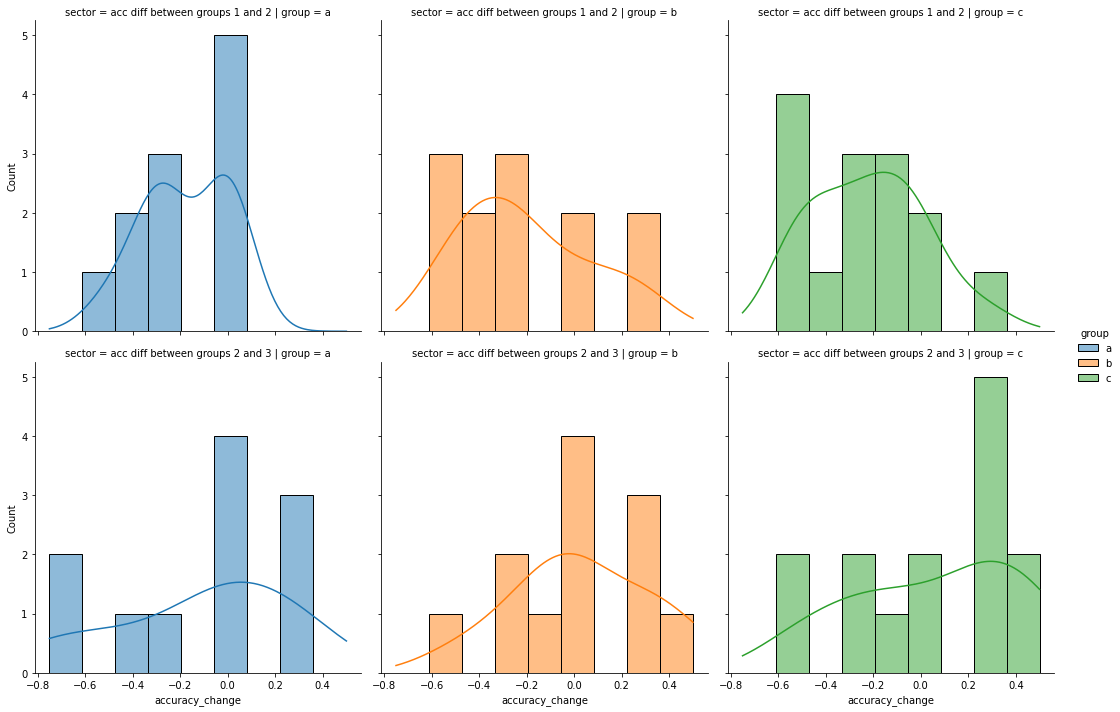

In [180]:
sns.displot(kind="hist", col="group", x="accuracy_change", row="sector", kde=True, data=results_sep_dif, hue="group");

Lets do the same with relative change

In [181]:
results_sep_dif_rel = pd.concat([
    acc_per_sector_without_idk_sep_v2_relative(pdaans, 'a'),
    acc_per_sector_without_idk_sep_v2_relative(pdbans, 'b'),
    acc_per_sector_without_idk_sep_v2_relative(pdcans, 'c')],
    ignore_index=True
)

In [182]:
results_sep_dif_rel.sample(2)

,accuracy_change,sector,group,idks_dist
54,-0.111111,acc diff between groups 1 and 2,c,0.0
17,-1.000000,acc diff between groups 2 and 3,a,0.0


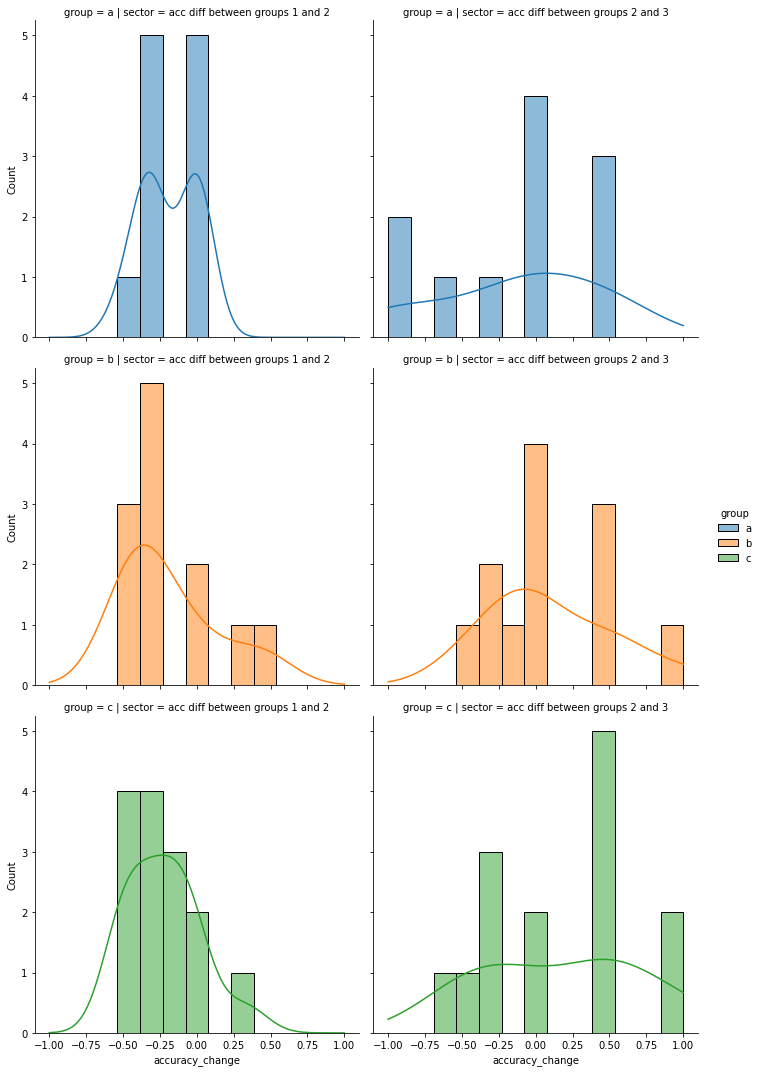

In [183]:
sns.displot(kind="hist", col="sector", x="accuracy_change", row="group", kde=True, data=results_sep_dif_rel, hue="group");

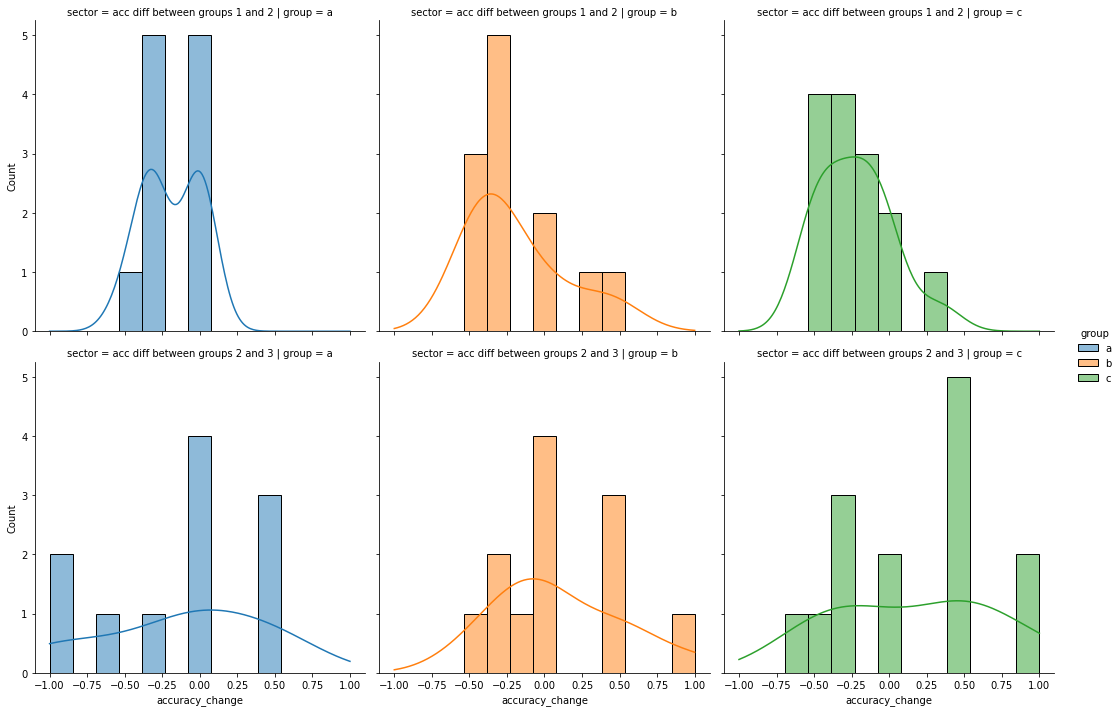

In [184]:
sns.displot(kind="hist", col="group", x="accuracy_change", row="sector", kde=True, data=results_sep_dif_rel, hue="group");

We choose relative change, so that the difference is more visible

In [185]:
# test normality of distributions

In [186]:
def normality_test(data, grp, sec):
    stat, p = st.shapiro(data)
    if p > alpha:
        print(f'Group {grp}, sector {sec}: Failed to reject H0, data looks Gaussian')
    else:
        print(f'Group {grp}, sector {sec}: Rejected H0, data does not look Gaussian')

In [187]:
for g in ['a', 'b', 'c']:
    for s in ['acc diff between groups 1 and 2', 'acc diff between groups 2 and 3']:
        normality_test(results_sep_dif_rel.accuracy_change.loc[(results_sep_dif.group == g) & (results_sep_dif.sector == s)], g, s)

Group a, sector acc diff between groups 1 and 2: Rejected H0, data does not look Gaussian
Group a, sector acc diff between groups 2 and 3: Failed to reject H0, data looks Gaussian
Group b, sector acc diff between groups 1 and 2: Rejected H0, data does not look Gaussian
Group b, sector acc diff between groups 2 and 3: Failed to reject H0, data looks Gaussian
Group c, sector acc diff between groups 1 and 2: Failed to reject H0, data looks Gaussian
Group c, sector acc diff between groups 2 and 3: Failed to reject H0, data looks Gaussian


In [188]:
for g in ['a', 'b', 'c']:
    for s in ['acc diff between groups 1 and 2', 'acc diff between groups 2 and 3']:
        normality_test(results_sep_dif.accuracy_change.loc[(results_sep_dif.group == g) & (results_sep_dif.sector == s)], g, s)

Group a, sector acc diff between groups 1 and 2: Rejected H0, data does not look Gaussian
Group a, sector acc diff between groups 2 and 3: Failed to reject H0, data looks Gaussian
Group b, sector acc diff between groups 1 and 2: Failed to reject H0, data looks Gaussian
Group b, sector acc diff between groups 2 and 3: Failed to reject H0, data looks Gaussian
Group c, sector acc diff between groups 1 and 2: Failed to reject H0, data looks Gaussian
Group c, sector acc diff between groups 2 and 3: Failed to reject H0, data looks Gaussian


---
---

## Closing questions analysis

In [191]:
pda.columns

Index(['technical_background', 'first_time', 't_a_before', 'q1', 't_a_1', 'q2',
       't_a_2', 'q3', 't_a_3', 'q4', 't_a_4', 't_b_before', 'q5', 't_b_1',
       'q6', 't_b_2', 'q7', 't_b_3', 'q8', 't_b_4', 't_c_before', 'q9',
       't_c_1', 'q10', 't_c_2', 'q11', 't_c_3', 'q12', 't_c_4',
       'Have you looked differently at  texts after seeing explanations?  ',
       'How much did the explanations affect your later predictions?',
       'Do you think that you understand the model more after seeing explanations than before seeing them?',
       'After seeing explanations, do you trust the model's decisions more or less?',
       'To better understand the model, would you prefer shorter or longer texts than those provided?',
       'Have you spot some mistakes  of the model (places where it makes bad decisions)? If you did, try to describe them ',
       'Place for your feedback'],
      dtype='object')

In [192]:
questioncols = {
    'Have you looked differently at  texts after seeing explanations?  ': "cq1",
    'How much did the explanations affect your later predictions?': "cq2",
    'Do you think that you understand the model more after seeing explanations than before seeing them?': "cq3",
    "After seeing explanations, do you trust the model's decisions more or less?": "cq4",
    "To better understand the model, would you prefer shorter or longer texts than those provided?": "cq5"
}
q_codes = {v: k for k, v in questioncols.items()}

In [193]:
pdaq = pda[questioncols].rename(columns=questioncols)
pdbq = pdb[questioncols].rename(columns=questioncols)
pdcq = pdc[questioncols].rename(columns=questioncols)

**1st question: Have you looked differently at  texts after seeing explanations?**

In [218]:
def combine_dfs(dfs, colname):
    vals = ['a', 'b', 'c']
    
    for i in range(len(dfs)):
        dfs[i] = pd.DataFrame(dfs[i][colname])
        dfs[i] = dfs[i][dfs[i][colname] != 5]
        dfs[i]['group'] = [vals[i] for _ in range(len(dfs[i]))]
    
    dfs = pd.concat(dfs, ignore_index=True)
    
    return dfs

In [221]:
cq1 = combine_dfs([pdaq, pdbq, pdcq], 'cq1')

In [196]:
cq1.head(3)

,cq1,group
0,3,a
1,7,a
2,2,a


In [223]:
def plot_faced(*, data, col, hue, x, width=12, height=6):
    g = sns.FacetGrid(data, col=col, hue=hue)
    g.map(sns.histplot, x, bins=11, kde=True)  # change to eleven bins
    g.add_legend()
    g.fig.subplots_adjust(top=0.9);
    g.fig.suptitle(q_codes[x]);
    g.fig.set_figwidth(width)
    g.fig.set_figheight(height)
    g.set_axis_labels("score")
    plt.xticks([x for x in range(0,11)]);
    plt.show()

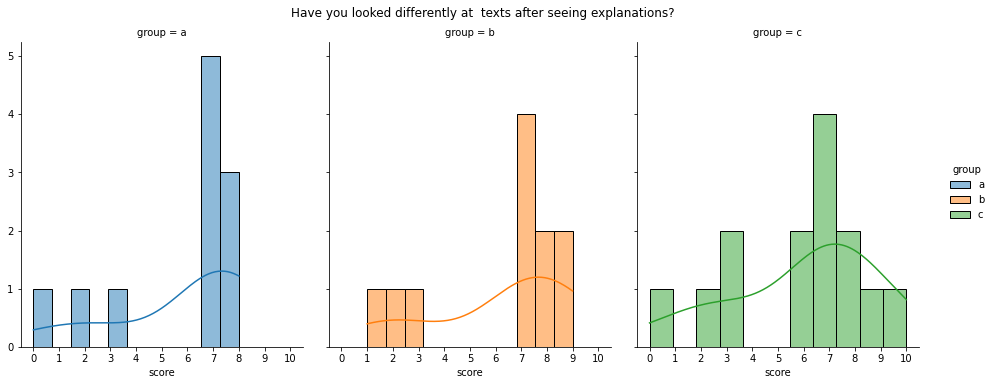

In [224]:
plot_faced(data=cq1, col="group", hue="group", x="cq1", width=14)

In [225]:
cq1.groupby(by="group").mean()

,cq1
group,
a,5.818182
b,6.181818
c,5.928571


**2nd question: How much did the explanations affect your later predictions?**

In [226]:
cq2 = combine_dfs([pdaq, pdbq, pdcq], 'cq2')

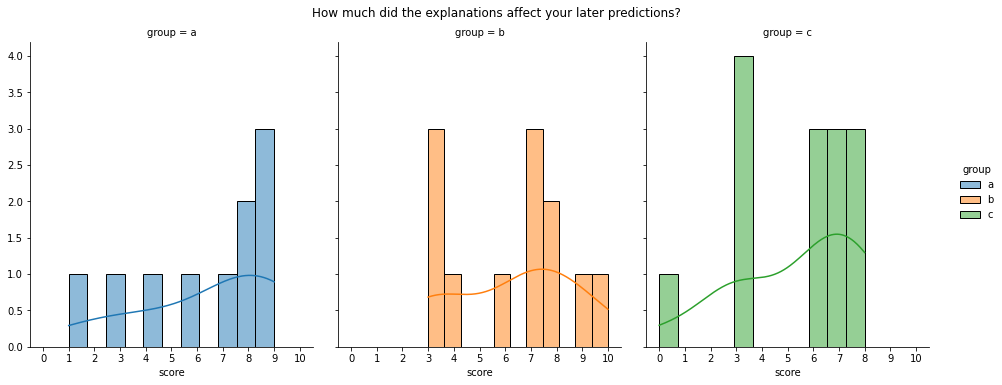

In [227]:
plot_faced(data=cq2, col="group", hue="group", x="cq2", width=14)

In [228]:
cq2.groupby(by="group").mean()

,cq2
group,
a,6.400000
b,6.250000
c,5.357143


**3rd question: Do you think that you understand the model more after seeing explanations than before seeing them?**

In [229]:
cq3 = combine_dfs([pdaq, pdbq, pdcq], 'cq3')

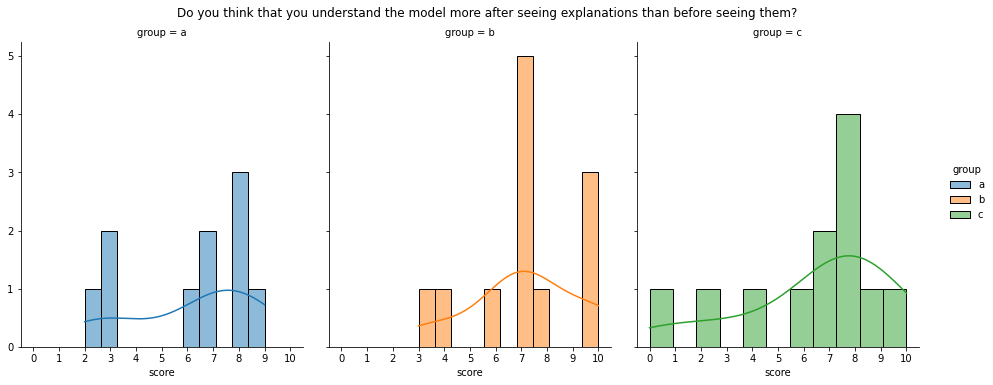

In [230]:
plot_faced(data=cq3, col="group", hue="group", x="cq3", width=14)

In [231]:
cq3.groupby(by="group").mean()

,cq3
group,
a,6.100000
b,7.166667
c,6.416667


**4th question: After seeing explanations, do you trust the model's decisions more or less?**

In [232]:
cq4 = combine_dfs([pdaq, pdbq, pdcq], 'cq4')

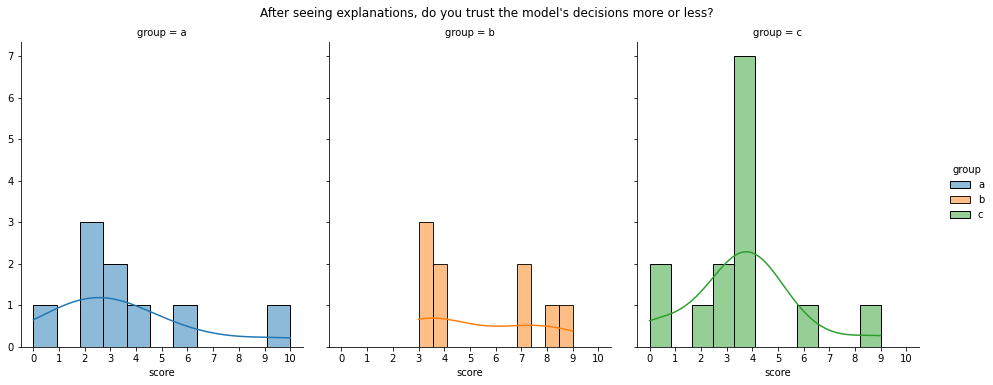

In [233]:
plot_faced(data=cq4, col="group", hue="group", x="cq4", width=14)

In [223]:
cq4.groupby(by="group").mean()

,cq4
group,
a,3.818182
b,5.250000
c,3.642857


**5th question: To better understand the model, would you prefer shorter or longer texts than those provided**

In [234]:
cq5 = combine_dfs([pdaq, pdbq, pdcq], 'cq5')

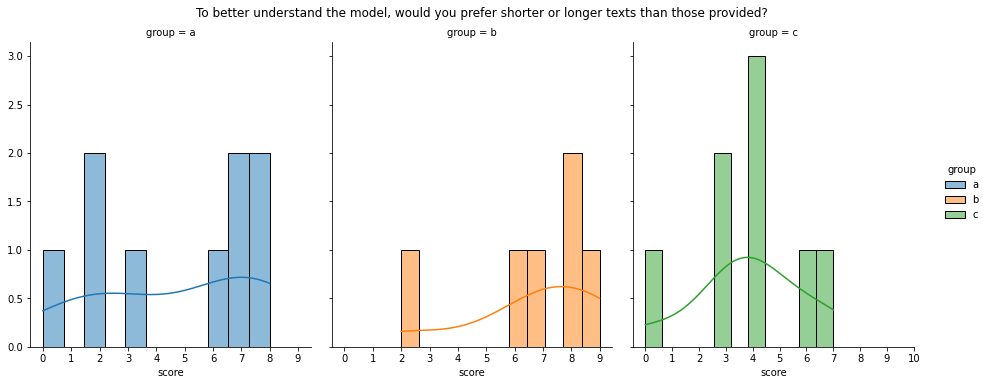

In [235]:
plot_faced(data=cq5, col="group", hue="group", x="cq5", width=14)

In [236]:
cq5.groupby(by="group").mean()

,cq5
group,
a,4.777778
b,6.666667
c,3.875000


**Model mistakes question**

*Have you spot some mistakes  of the model (places where it makes bad decisions)? If you did, try to describe them*

In [227]:
feedbackcols = {
    'Have you spot some mistakes  of the model (places where it makes bad decisions)? If you did, try to describe them ': 'model_behavior',
    'Place for your feedback': 'feedback'
}

In [228]:
pdaf = pda[feedbackcols].rename(columns=feedbackcols)
pdbf = pdb[feedbackcols].rename(columns=feedbackcols)
pdcf = pdc[feedbackcols].rename(columns=feedbackcols)

**Group A spotted model mistakes and feedback**

In [229]:
indexes = pdaf[pdaf.model_behavior.notna()].model_behavior.index
for i in indexes:
    with pd.option_context('display.max_colwidth', 800):
        print(pdaf.loc[i, "model_behavior"])
        print('---')

I don't quite understand why some words, such as ''community, American, to, this, other, public, is," etc. are classified as more "atheist" than ''christian''. For example, I think the word community is very often used referring to religion. 

Also, I don't understand why the word ''online'' is considered more christian than atheist.

There are words in the model that I would consider as typical for christian texts, for example ''kingdom, Messiah, testament, babylonian'' whereas the model sees them as neutral.

---
From the explanations, it does not seem logical to use words such as "the", "from", "by", "and", "other", etc. to try and understand if a text is talking about a topic or another.
---
I would like to know if model works from beginnig, or collected some texts before. For example word "Google" was strongly atheistic, so model cathegorize this word during first four texts, or it has some previous search with occurrence of this word?

---
None
---
For example, I think testament 

In [230]:
indexes = pdaf[pdaf.feedback.notna()].feedback.index
for i in indexes:
    with pd.option_context('display.max_colwidth', 800):
        print(pdaf.loc[i, "feedback"])
        print('---')

I am not sure if the model tries to simulate human decisions or not. If yes, I'd say it's not very accurate. However, I don't know the statistics that's behind the model. 

I tried to answer all the questions, diagonally reading the examples, imagining I am some kind of AI.
The times I answered ''I do not know'' equals times when I saw both words ''christian'' and ''atheist'' in the article and was not sure which is more prevalent.
---
- It would be nice to have a list of words which are used to determine a topic or another (since the IA has it present all along).
- Even though the colour is represented to know how strong or weak a word is for a topic, it would be nice to have some other scale (for example numbers, so it can be more understandable if 4 "and" are stronger than 1 "Church".
- It would be also nive if it was explained why some words are chosen for one topic or another (for example, the ones mentioned in the above question).
---
Interesting!
---


**Group B spotted model mistakes and feedback**

In [231]:
indexes = pdbf[pdbf.model_behavior.notna()].model_behavior.index
for i in indexes:
    with pd.option_context('display.max_colwidth', 800):
        print(pdbf.loc[i, "model_behavior"])
        print('---')

Sometimes the words used in the text would fall under the category of Christianity, however, the meaning was different and vice versa.
---
it considered words like "and" atheist, and did not put any value to words like "Exodus", or "Flood" in a religious context.
---
"and" is a very neutral word (I'd say) but it is attributed to be "atheist" for example
---
Religious = atheist => I think it should be under Christianity or at least neutral 
Dividing North Carolina as North = Christianity and Carolina = atheist 
and couple "small" words like "and, as, much, ..." they should probably be neutral I think 
---
I haven't 
---
No
---


In [232]:
indexes = pdbf[pdbf.feedback.notna()].feedback.index
for i in indexes:
    with pd.option_context('display.max_colwidth', 800):
        print(pdbf.loc[i, "feedback"])
        print('---')

In order to better predict the decision, I need to know if there is a "base" value for the AI decision-making process, like "all texts are atheist unless there are words like Bible, Christian, etc" OR if the AI really chooses between two options and it is possible for it to not choose if it does not have enough data or both sides have scored similarly.
---
It would be great if a 'back' icon would be available in some of the pages, not to change the answers but to look back at the explanations. 
---
Interesting keywords the model used that I have never thought would be relevant to detect a text bias towards atheism or Christianity. It will be interesting to compose a text manually based on neutral words from atheism related to Christianity and see the outcome!  
---


**Group C spotted model mistakes and feedback**

In [233]:
indexes = pdcf[pdcf.model_behavior.notna()].model_behavior.index
for i in indexes:
    with pd.option_context('display.max_colwidth', 800):
        print(pdcf.loc[i, "model_behavior"])
        print('---')

In [234]:
indexes = pdcf[pdcf.feedback.notna()].feedback.index
for i in indexes:
    with pd.option_context('display.max_colwidth', 800):
        print(pdcf.loc[i, "feedback"])
        print('---')

I have seen, that the model is just computer algorithm, which was trained on some texts. It was visible mainly on some words, which are neutral - e.g. "the" was "christian" word, whereas "of", "to" were "atheist" words. Surprise for me was that words "belief" and "believe" were "atheist" words.
---
the website sometime scrolled up by itself without my effect in it.
---


---
---

## Technical background, does it have some effect on predictions or time?

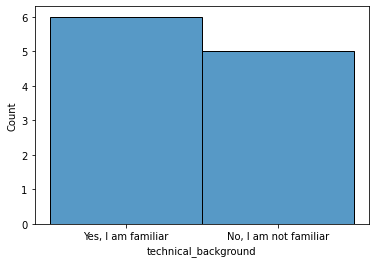

In [262]:
sns.histplot(x="technical_background", data=pda);

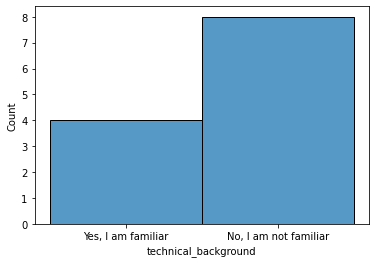

In [263]:
sns.histplot(x="technical_background", data=pdb);

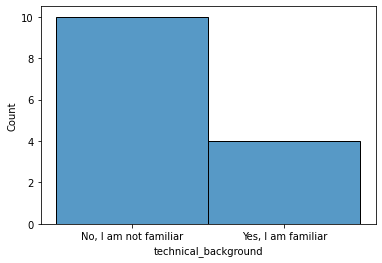

In [264]:
sns.histplot(x="technical_background", data=pdc);

In [283]:
tech_bgnd_mask = lambda df: list(df.technical_background == "Yes, I am familiar")
tech_bgnd_mask(pda)[:2]

[True, True]

In [284]:
tech_col = np.concatenate([tech_bgnd_mask(pda), tech_bgnd_mask(pdb), tech_bgnd_mask(pdc)])

In [285]:
tech_col

array([ True,  True,  True, False, False,  True, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
        True])

In [289]:
taans = pdaans.copy(deep=True)
tbans = pdbans.copy(deep=True)
tcans = pdcans.copy(deep=True)

taans['tech'] = tech_bgnd_mask(pda)
tbans['tech'] = tech_bgnd_mask(pdb)
tcans['tech'] = tech_bgnd_mask(pdc)

In [308]:
def acc_per_sector_without_idk_sep_v2(df, group_letter):
    correct = df.iloc[:,:12] == true_mask
    idk_mask = df.iloc[:,:12] == -1

    s1 = correct.iloc[:, 0:4].sum(axis=1)
    s1idk = 4 - idk_mask.iloc[:, 0:4].sum(axis=1)
    s1 = s1 / s1idk
    idks1 = idk_mask.iloc[:, 0:4].sum(axis=1) / 4
    
    s2 = correct.iloc[:, 4:8].sum(axis=1) / (4 - idk_mask.iloc[:, 4:8].sum(axis=1))
    idks2 = idk_mask.iloc[:, 4:8].sum(axis=1) / 4
    
    s3 = correct.iloc[:, 8:12].sum(axis=1) / (4 - idk_mask.iloc[:, 8:12].sum(axis=1))
    idks3 = idk_mask.iloc[:, 8:12].sum(axis=1) / 4

    return pd.DataFrame({
        "accuracy": np.concatenate([s1, s2, s3]),
        "sector": [1 for x in range(len(s1))] + [2 for x in range(len(s2))] + [3 for x in range(len(s3))],
        "group": [group_letter for _ in range(len(s1)*3)],
        "idks_dist": np.concatenate([idks1, idks2, idks3]),
        "tech": np.concatenate([df.tech for _ in range(3)])
    })

In [312]:
results_sec_tech = pd.concat([
    acc_per_sector_without_idk_sep_v2(taans, 'a'),
    acc_per_sector_without_idk_sep_v2(tbans, 'b'),
    acc_per_sector_without_idk_sep_v2(tcans, 'c')],
    ignore_index=True
)

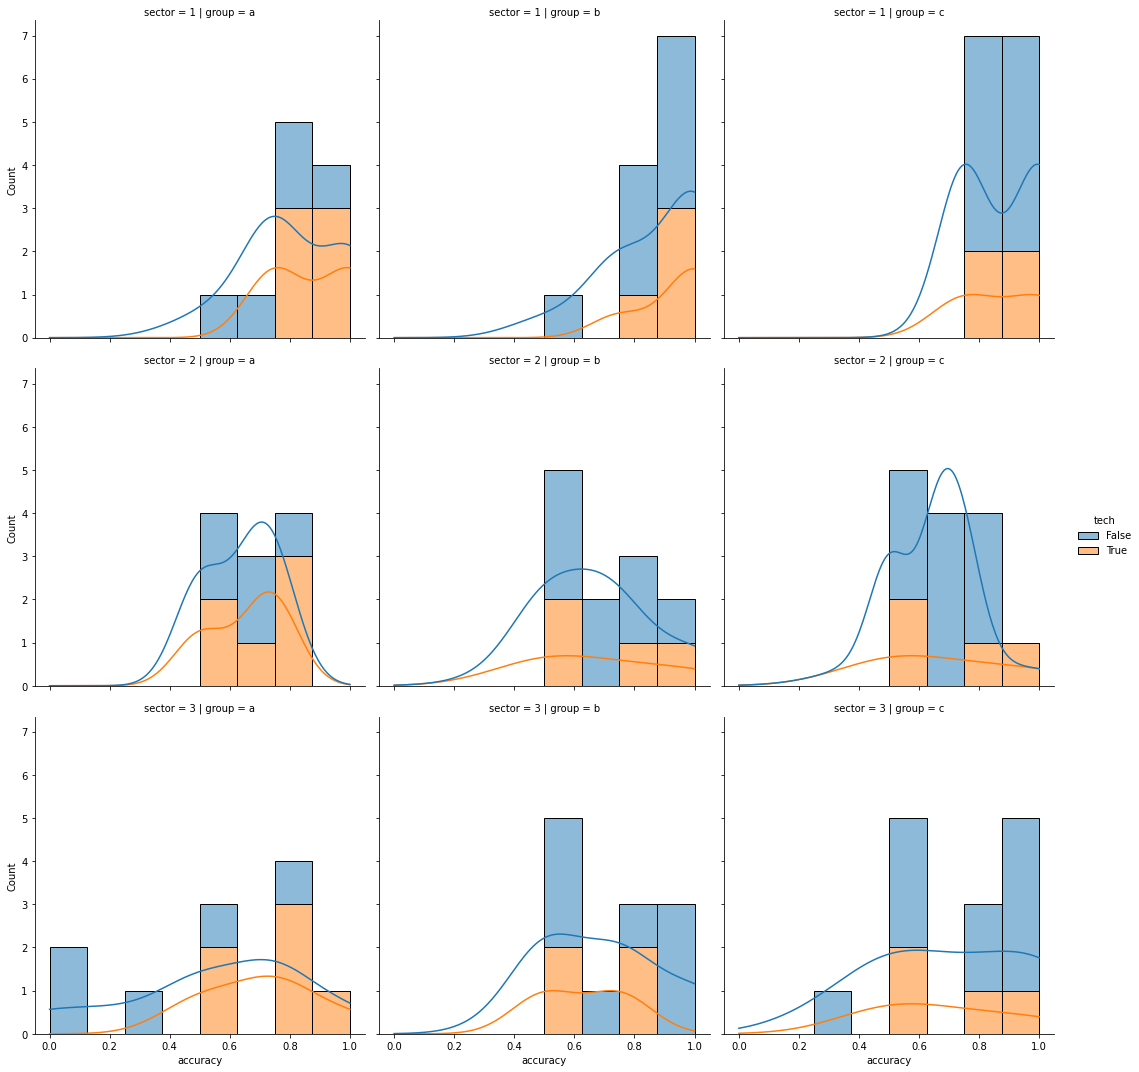

In [315]:
sns.displot(kind="hist", col="group", x="accuracy", row="sector", kde=True, data=results_sec_tech, hue="tech", multiple="stack")